In [317]:
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import stats
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
markers = ["o", "s", "d", "^", "v", "*", "p"]
lineStyles = ["solid", "dashed", "dashdot", "dotted", "-", ":", "-."]

# Hyperparameter profiling

In [318]:
# profiling figure for B
B_list = [50, 100, 200, 400]
k_list = [10]
B12_list = [[5, 200], [10, 200], [20, 50], [20, 100], [20, 200], [40, 200], [20, 400]]
sample_number = [128, 256, 512, 1024, 2048, 4096]

with open("./profiling/obj_lists_B.json", "r") as f:
    obj_lists = json.load(f)

SAA_obj_list = obj_lists["SAA_obj_list"]
SAA_obj_avg = obj_lists["SAA_obj_avg"]
bagging_alg1_obj_list = obj_lists["bagging_alg1_obj_list"]
bagging_alg1_obj_avg = obj_lists["bagging_alg1_obj_avg"]
bagging_alg3_obj_list = obj_lists["bagging_alg3_obj_list"]
bagging_alg3_obj_avg = obj_lists["bagging_alg3_obj_avg"]
bagging_alg4_obj_list = obj_lists["bagging_alg4_obj_list"]
bagging_alg4_obj_avg = obj_lists["bagging_alg4_obj_avg"]

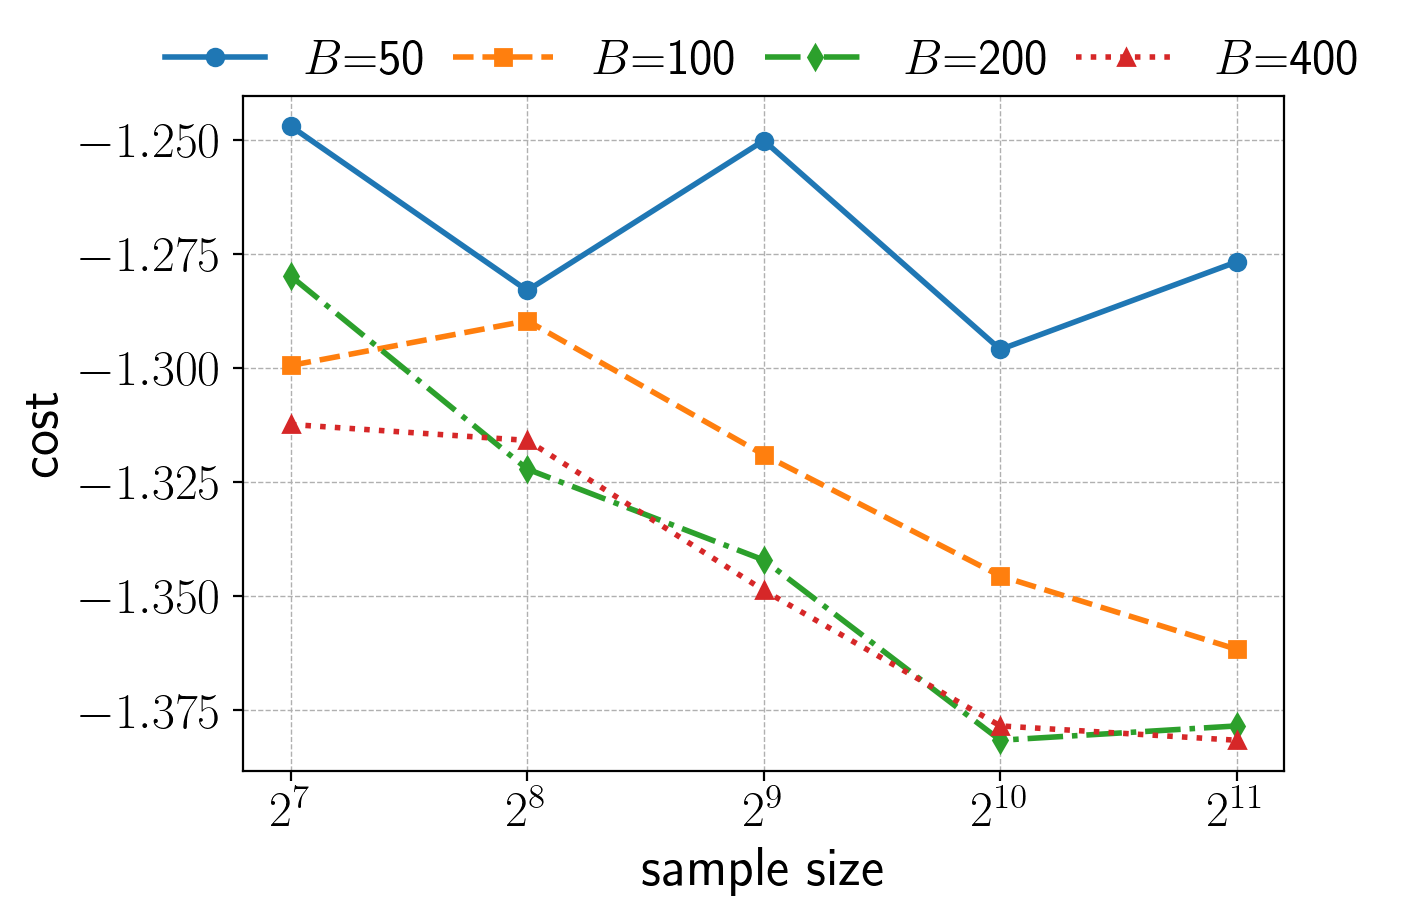

In [319]:
fig, ax = plt.subplots(figsize=(7, 5), dpi=200)

for ind, B in enumerate(B_list):
    curve = [-item for item in bagging_alg1_obj_avg[ind][0][:-1]]
    ax.plot(sample_number[:-1], curve, marker=markers[ind % len(markers)],
            linestyle=lineStyles[ind % len(lineStyles)], linewidth=2,
            color=default_colors[ind % len(default_colors)], label=f"$B$={B}")

ax.set_xlabel('sample size', size=20)
ax.set_ylabel('cost', size=20)
ax.set_xscale('log', base = 2)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# log_ticks = np.log2(sample_number)
# ax.xaxis.set_major_locator(ticker.FixedLocator(log_ticks))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(B_list), columnspacing=0.5, fontsize=18, frameon=False)
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("./profiling/profiling_alg1_B.png", dpi=500, bbox_inches='tight')  # Adjust the dpi as needed
plt.show()

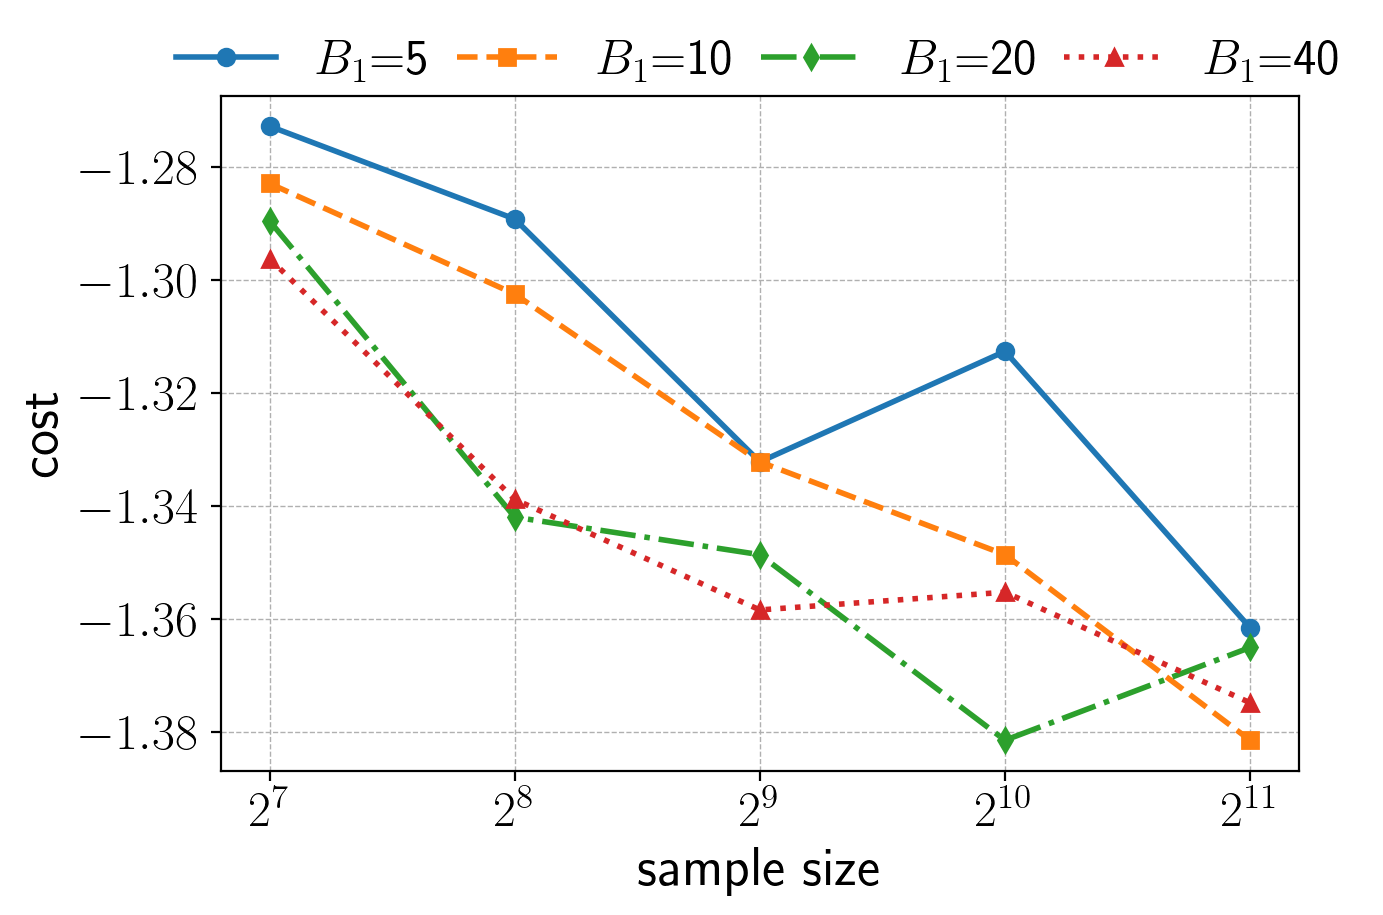

In [320]:
fig, ax = plt.subplots(figsize = (7, 5), dpi=200)
ind = 0
for _, B12 in enumerate(B12_list):
    if B12 not in [[5, 200], [10, 200], [20, 200], [40, 200]]:
        continue
    curve = [-item for item in bagging_alg3_obj_avg[_][0][:-1]]
    ax.plot(sample_number[:-1], curve, marker=markers[ind % len(markers)],
            linestyle=lineStyles[ind % len(lineStyles)], linewidth=2,
            color=default_colors[ind % len(default_colors)], 
            label=f"$B_1$={B12[0]}")
    ind += 1

ax.set_xlabel('sample size', size=20)
ax.set_ylabel('cost', size=20)
ax.set_xscale('log', base = 2)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# log_ticks = np.log2(sample_number)
# ax.xaxis.set_major_locator(ticker.FixedLocator(log_ticks))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(B_list), columnspacing=0.5, fontsize=18, frameon=False)
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("./profiling/profiling_alg3_B1.png",  dpi=500, bbox_inches='tight')
plt.show()

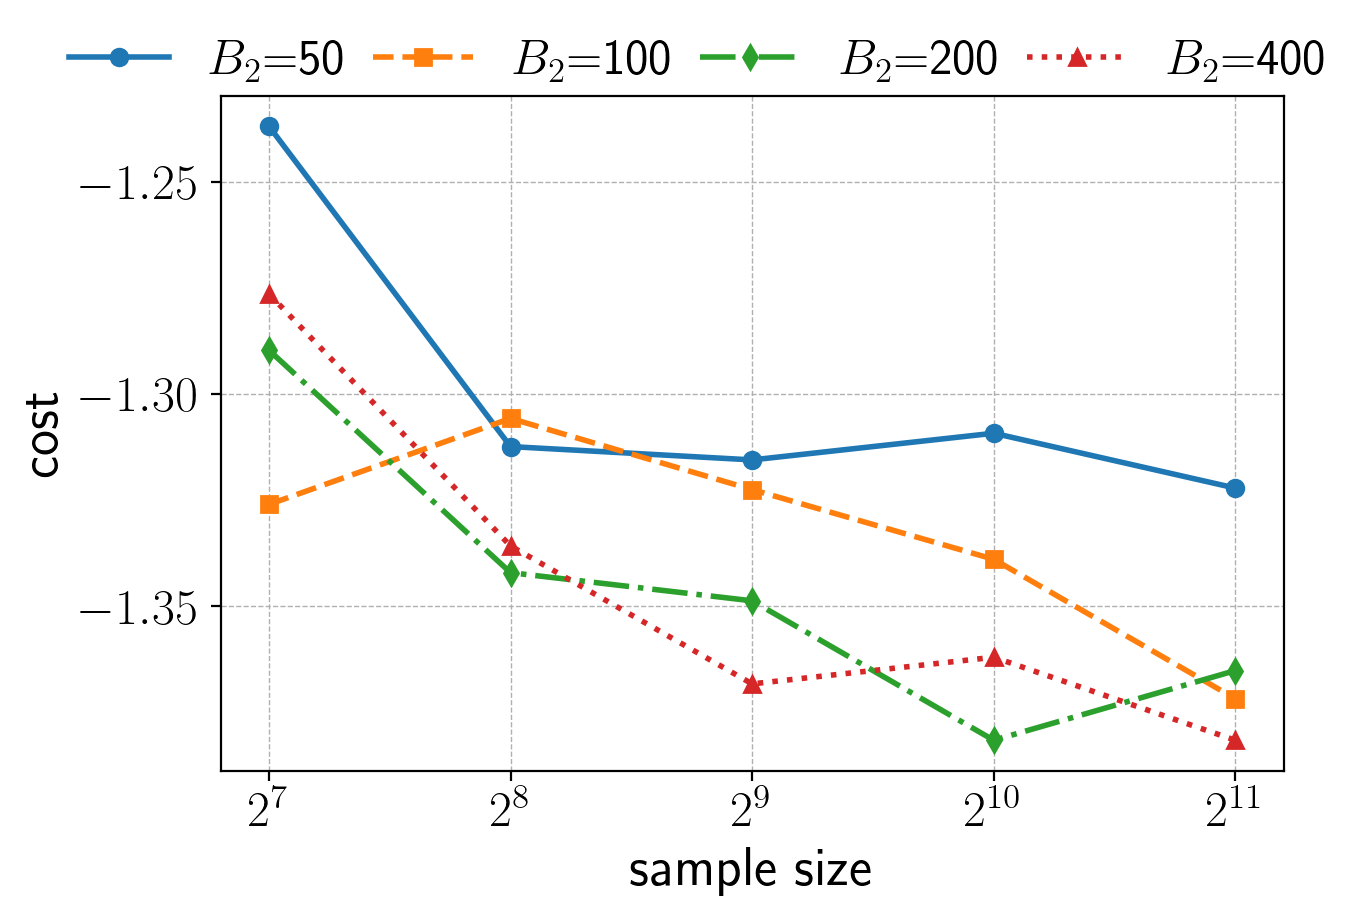

In [321]:
# algorithm 3, choose B2 (Figure 7c)
fig, ax = plt.subplots(figsize = (7, 5), dpi=200)
ind = 0
for _, B12 in enumerate(B12_list):
    if B12 not in [[20, 50], [20, 100], [20, 200], [20, 400]]:
        continue
    curve = [-item for item in bagging_alg3_obj_avg[_][0][:-1]]
    ax.plot(sample_number[:-1], curve, marker=markers[ind % len(markers)],
            linestyle=lineStyles[ind % len(lineStyles)], linewidth=2,
            color=default_colors[ind % len(default_colors)],
            label=f"$B_2$={B12[1]}")
    ind += 1

ax.set_xlabel('sample size', size=20)
ax.set_ylabel('cost', size=20)
ax.set_xscale('log', base = 2)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# log_ticks = np.log2(sample_number)
# ax.xaxis.set_major_locator(ticker.FixedLocator(log_ticks))
ax.legend(loc='upper center', bbox_to_anchor=(0.45, 1.15), ncol=len(B_list), columnspacing=0.5, fontsize=18, frameon=False)
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("./profiling/profiling_alg3_B2.png", dpi=500, bbox_inches='tight')
plt.show()

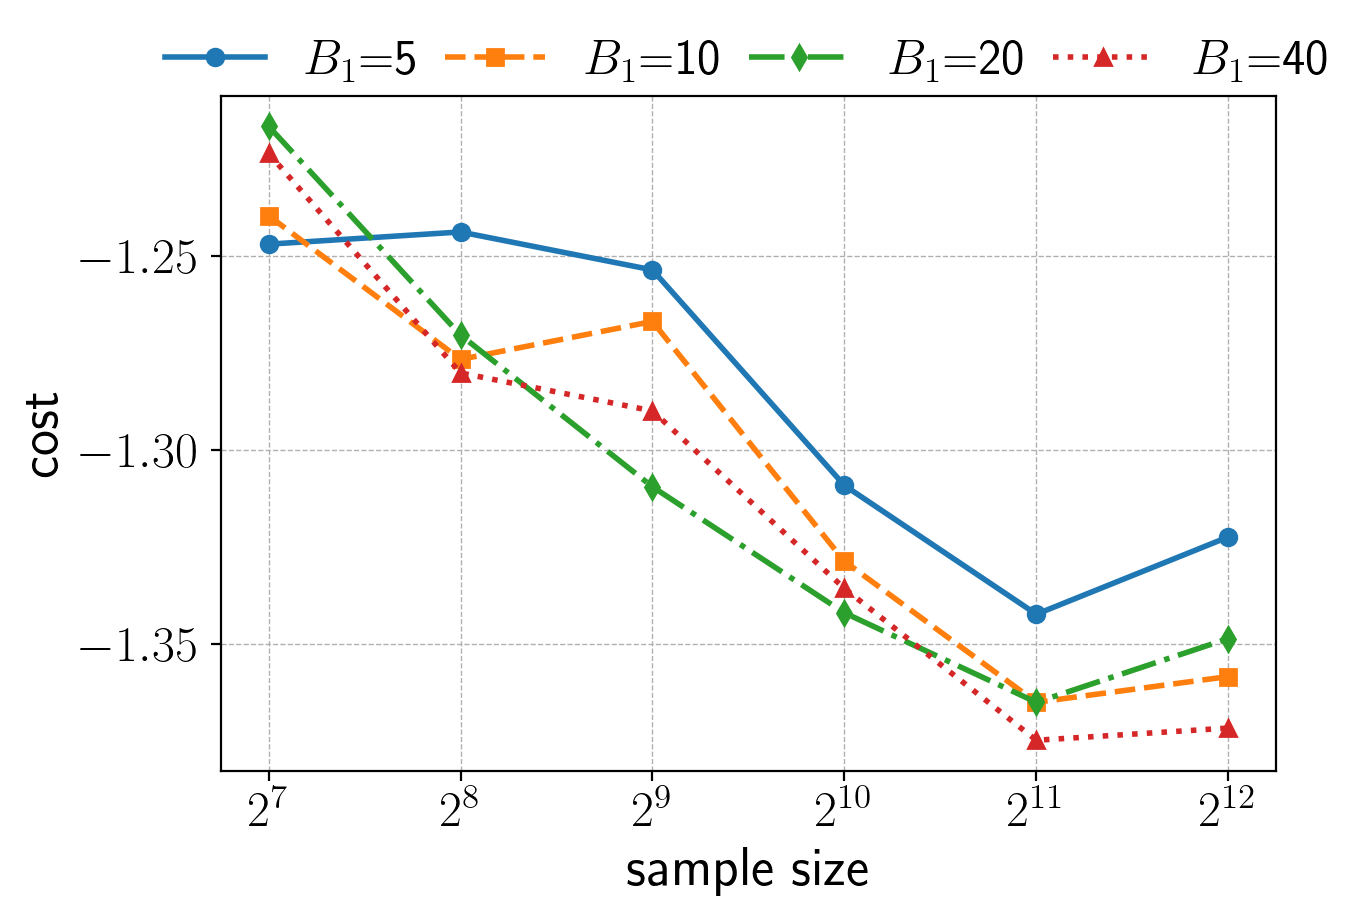

In [322]:
# algorithm 4, choose B1 (not used)
fig, ax = plt.subplots(figsize = (7, 5), dpi=200)

ind = 0
for _, B12 in enumerate(B12_list):
    if B12 not in [[5, 200], [10, 200], [20, 200], [40, 200]]:
        continue
    curve = [-item for item in bagging_alg4_obj_avg[_][0]]
    ax.plot(sample_number, curve, marker=markers[ind % len(markers)],
            linestyle=lineStyles[ind % len(lineStyles)], linewidth=2,
            color=default_colors[ind % len(default_colors)],
            label=f"$B_1$={B12[0]}")
    ind += 1

ax.set_xlabel('sample size', size=20)
ax.set_ylabel('cost', size=20)
ax.set_xscale('log', base = 2)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(B_list), columnspacing=0.5,fontsize=18, frameon=False)
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("./profiling/profiling_alg4_B1.png", dpi=500, bbox_inches='tight')
plt.show()

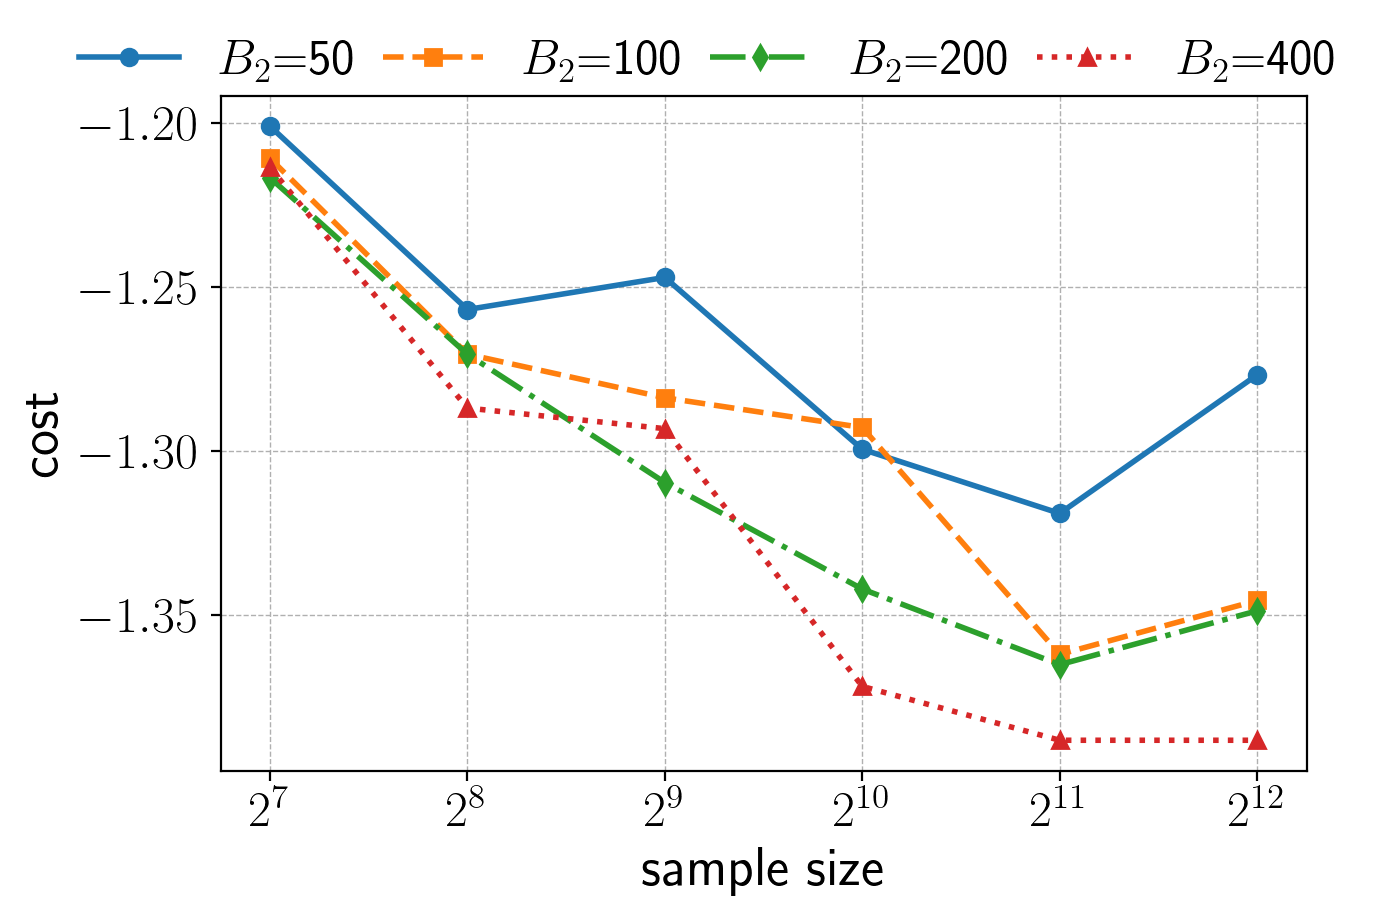

In [323]:
# algorithm 4, choose B2 (not used)
fig, ax = plt.subplots(figsize = (7, 5), dpi=200)

ind = 0
for _, B12 in enumerate(B12_list):
    if B12 not in [[20, 50], [20, 100], [20, 200], [20, 400]]:
        continue
    curve = [-item for item in bagging_alg4_obj_avg[_][0]]
    ax.plot(sample_number, curve, marker=markers[ind % len(markers)],
            linestyle=lineStyles[ind % len(lineStyles)], linewidth=2,
            color=default_colors[ind % len(default_colors)],
            label=f"$B_2$={B12[1]}")
    ind += 1

ax.set_xlabel('sample size', size=20)
ax.set_ylabel('cost', size=20)
ax.set_xscale('log', base = 2)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

ax.legend(loc='upper center', bbox_to_anchor=(0.45, 1.15), ncol=len(B_list),columnspacing=0.5,fontsize=18, frameon=False)
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("./profiling/profiling_alg4_B2.png", dpi = 500, bbox_inches='tight')
plt.show()

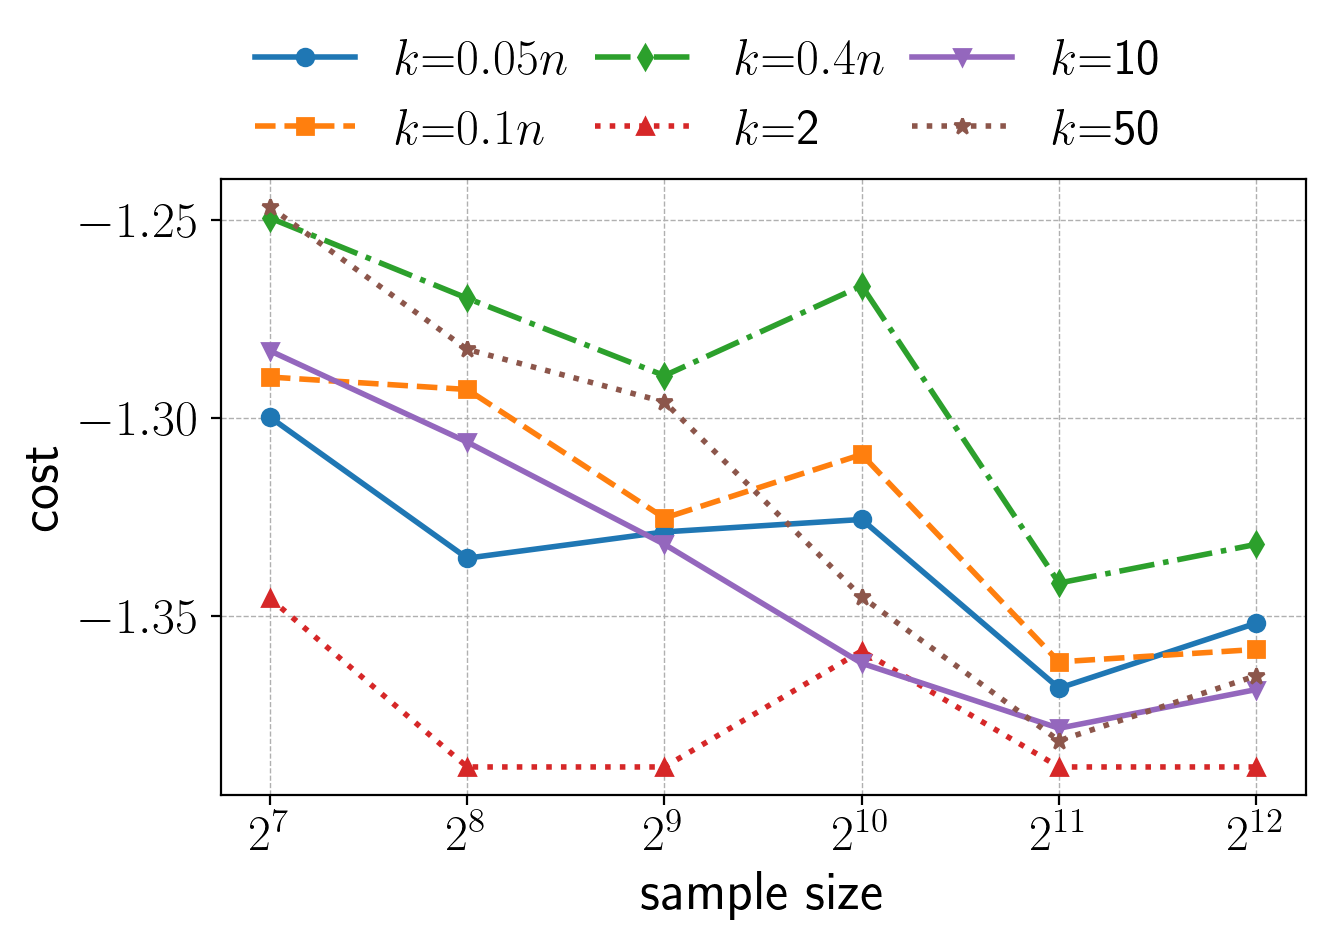

In [324]:
# profiling figure for k Figures 1a
B_list = [200]
B12_list = [(20,200)]

k_list = [0.05, 0.1, 0.2, 0.4, 2, 10, 20, 50]
sample_number = [128, 256, 512, 1024, 2048, 4096]

with open("./profiling/obj_lists_k_1.json", "r") as f:
    obj_lists = json.load(f)

SAA_obj_list = obj_lists["SAA_obj_list"]
SAA_obj_avg = obj_lists["SAA_obj_avg"]
bagging_alg1_obj_list = obj_lists["bagging_alg1_obj_list"]
bagging_alg1_obj_avg = obj_lists["bagging_alg1_obj_avg"]
bagging_alg3_obj_list = obj_lists["bagging_alg3_obj_list"]
bagging_alg3_obj_avg = obj_lists["bagging_alg3_obj_avg"]
bagging_alg4_obj_list = obj_lists["bagging_alg4_obj_list"]
bagging_alg4_obj_avg = obj_lists["bagging_alg4_obj_avg"]

# algorithm 1, choose k parameter1
fig, ax = plt.subplots(figsize = (7, 4), dpi=200)
ind = 0
for _, k in enumerate(k_list):
    if k not in [0.2, 20]:
        label_name = f"$k$={k}" if k > 1 else f"$k$=${k}n$"
        curve = [-item for item in bagging_alg1_obj_avg[0][_]]
        ax.plot(sample_number, curve, marker=markers[ind % len(markers)],
            linestyle=lineStyles[ind % len(lineStyles)], linewidth=2,
            color=default_colors[ind % len(default_colors)],
            label=label_name)
        ind += 1

ax.set_xlabel('sample size', size=20)
ax.set_ylabel('cost', size=20)
ax.set_xscale('log', base = 2)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.legend(loc='upper center', bbox_to_anchor=(0.45, 1.3), fontsize=18, ncol=3, frameon=False, bbox_transform=ax.transAxes, columnspacing=0.5)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig("./profiling/profiling_alg1_k_1.png",dpi = 500, bbox_inches='tight')
plt.show()

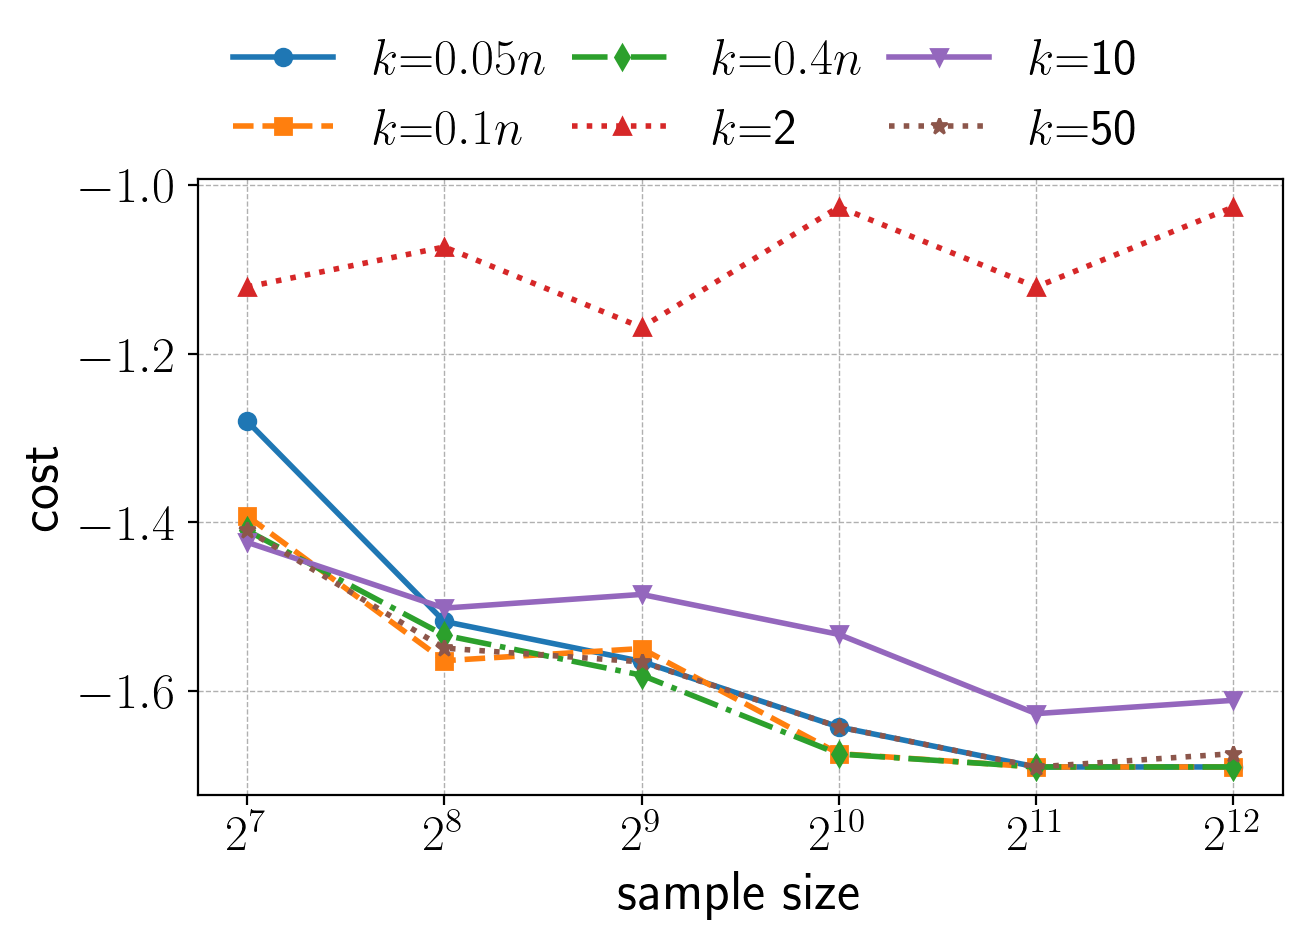

In [325]:
# profiling figure for k Figures 6a
B_list = [200]
B12_list = [(20,200)]

k_list = [0.05, 0.1, 0.2, 0.4, 2, 10, 20, 50]
sample_number = [128, 256, 512, 1024, 2048, 4096]

with open("./profiling/obj_lists_k_2.json", "r") as f:
    obj_lists = json.load(f)

SAA_obj_list = obj_lists["SAA_obj_list"]
SAA_obj_avg = obj_lists["SAA_obj_avg"]
bagging_alg1_obj_list = obj_lists["bagging_alg1_obj_list"]
bagging_alg1_obj_avg = obj_lists["bagging_alg1_obj_avg"]
bagging_alg3_obj_list = obj_lists["bagging_alg3_obj_list"]
bagging_alg3_obj_avg = obj_lists["bagging_alg3_obj_avg"]
bagging_alg4_obj_list = obj_lists["bagging_alg4_obj_list"]
bagging_alg4_obj_avg = obj_lists["bagging_alg4_obj_avg"]

# algorithm 1, choose k parameter1
fig, ax = plt.subplots(figsize = (7, 4), dpi=200)
ind = 0
for _, k in enumerate(k_list):
    if k not in [0.2, 20]:
        label_name = f"$k$={k}" if k > 1 else f"$k$=${k}n$"
        curve = [-item for item in bagging_alg1_obj_avg[0][_]]
        ax.plot(sample_number, curve, marker=markers[ind % len(markers)],
            linestyle=lineStyles[ind % len(lineStyles)], linewidth=2,
            color=default_colors[ind % len(default_colors)],
            label=label_name)
        ind += 1

ax.set_xlabel('sample size', size=20)
ax.set_ylabel('cost', size=20)
ax.set_xscale('log', base = 2)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.legend(loc='upper center', bbox_to_anchor=(0.45, 1.3), fontsize=18, ncol=3, frameon=False, bbox_transform=ax.transAxes, columnspacing=0.5)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig("./profiling/profiling_alg1_k_2.png", dpi=500, bbox_inches='tight')
plt.show()

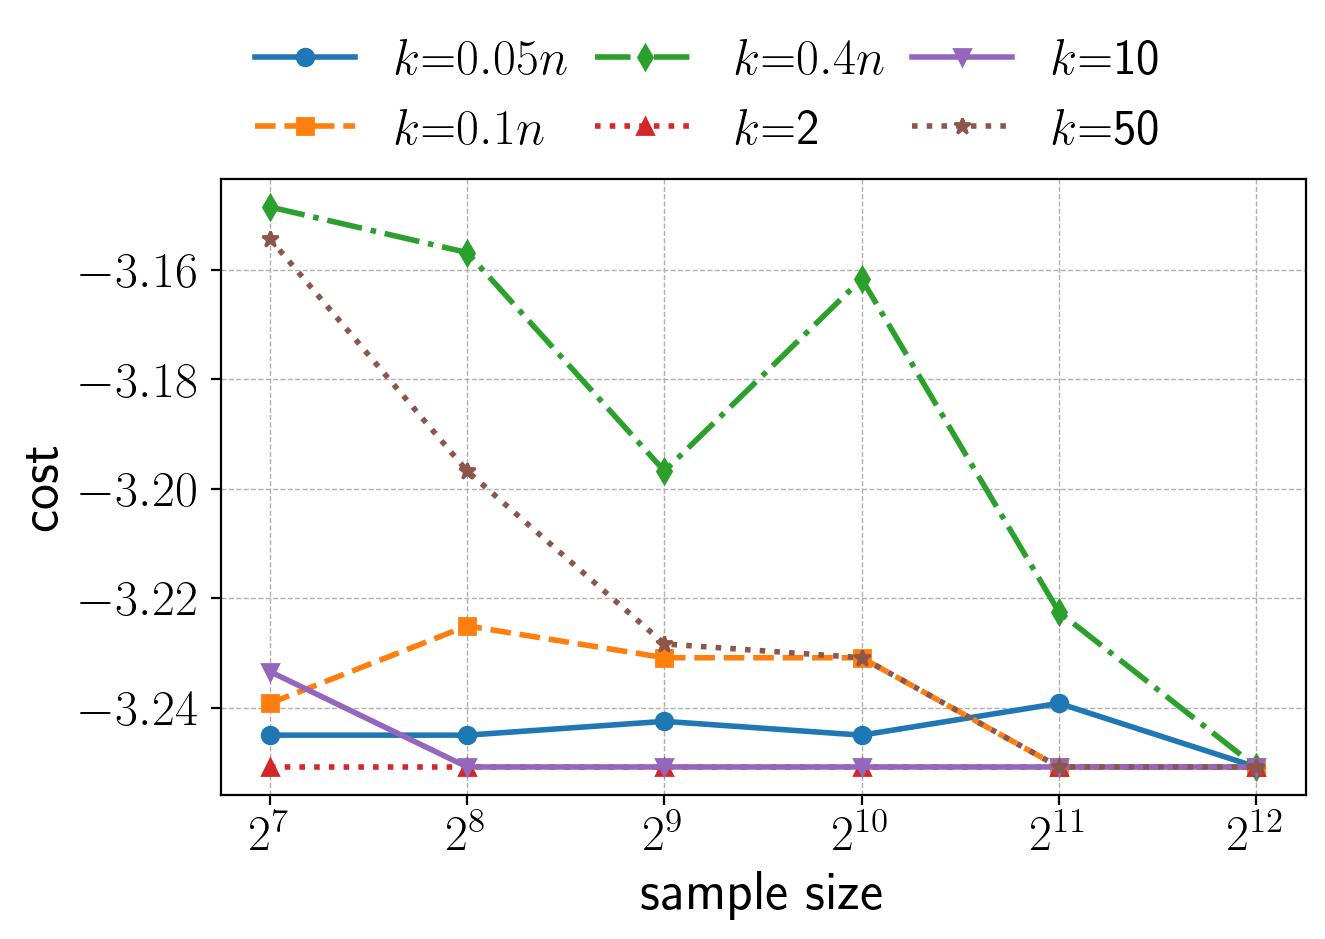

In [326]:
# profiling figure for k Figures 6b
B_list = [200]
B12_list = [(20,200)]

k_list = [0.05, 0.1, 0.4, 2, 10, 50]
sample_number = [128, 256, 512, 1024, 2048, 4096]

with open("./profiling/obj_lists_k_3.json", "r") as f:
    obj_lists = json.load(f)

SAA_obj_list = obj_lists["SAA_obj_list"]
SAA_obj_avg = obj_lists["SAA_obj_avg"]
bagging_alg1_obj_list = obj_lists["bagging_alg1_obj_list"]
bagging_alg1_obj_avg = obj_lists["bagging_alg1_obj_avg"]
bagging_alg3_obj_list = obj_lists["bagging_alg3_obj_list"]
bagging_alg3_obj_avg = obj_lists["bagging_alg3_obj_avg"]
bagging_alg4_obj_list = obj_lists["bagging_alg4_obj_list"]
bagging_alg4_obj_avg = obj_lists["bagging_alg4_obj_avg"]

# algorithm 1, choose k parameter1
fig, ax = plt.subplots(figsize = (7, 4), dpi=200)
ind = 0
for _, k in enumerate(k_list):
    if k not in [0.2, 20]:
        label_name = f"$k$={k}" if k > 1 else f"$k$=${k}n$"
        curve = [-item for item in bagging_alg1_obj_avg[0][_]]
        ax.plot(sample_number, curve, marker=markers[ind % len(markers)],
            linestyle=lineStyles[ind % len(lineStyles)], linewidth=2,
            color=default_colors[ind % len(default_colors)],
            label=label_name)
        ind += 1

ax.set_xlabel('sample size', size=20)
ax.set_ylabel('cost', size=20)
ax.set_xscale('log', base = 2)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.legend(loc='upper center', bbox_to_anchor=(0.45, 1.3), fontsize=18, ncol=3, frameon=False, bbox_transform=ax.transAxes, columnspacing=0.5)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig("./profiling/profiling_alg1_k_3.png", dpi=500, bbox_inches='tight')
plt.show()

dict_keys(['SAA_obj_list', 'SAA_obj_avg', 'bagging_alg1_obj_list', 'bagging_alg1_obj_avg', 'bagging_alg3_obj_list', 'bagging_alg3_obj_avg', 'bagging_alg4_obj_list', 'bagging_alg4_obj_avg'])


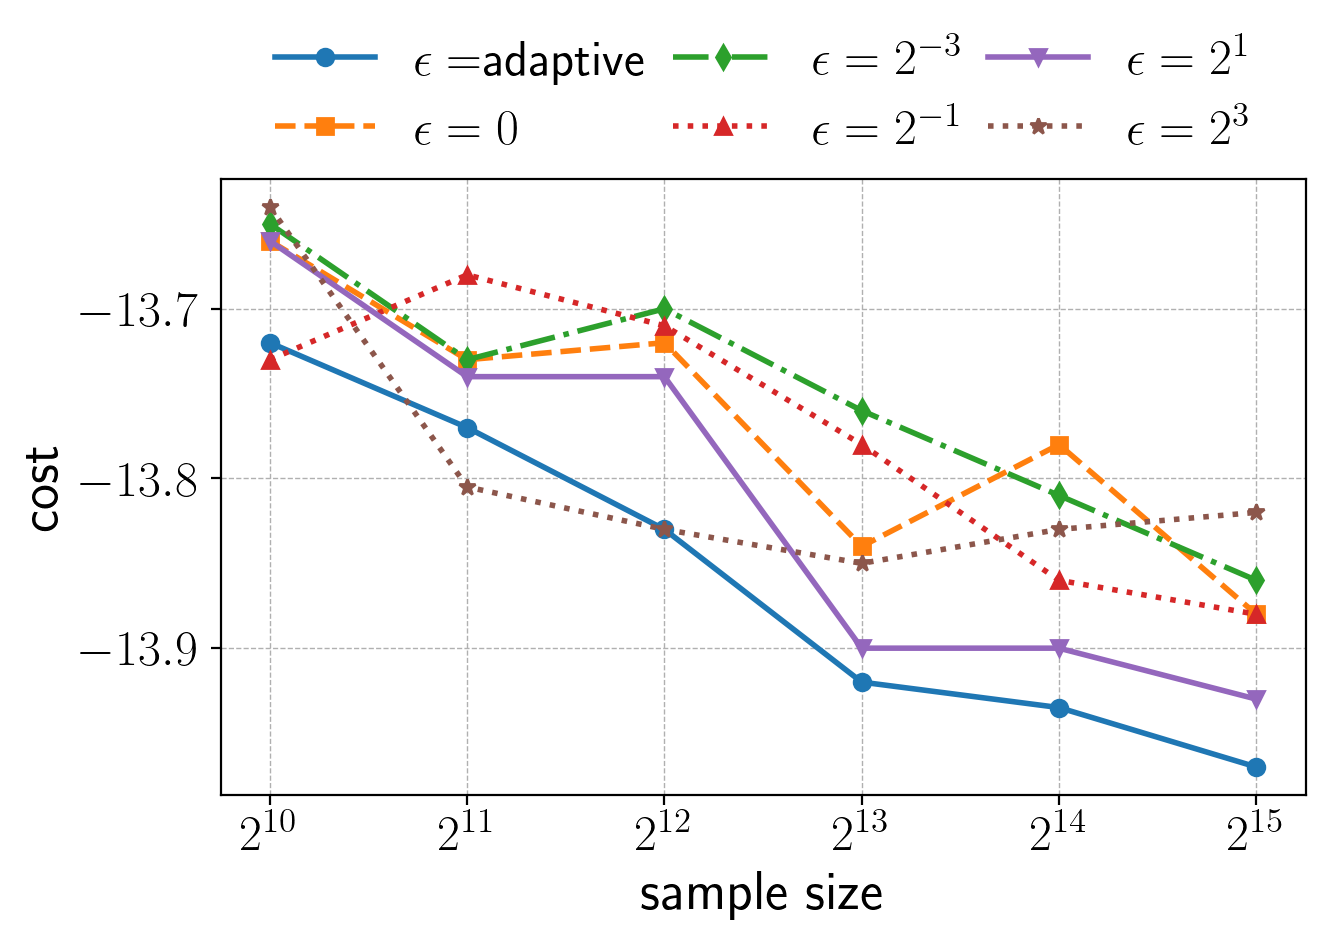

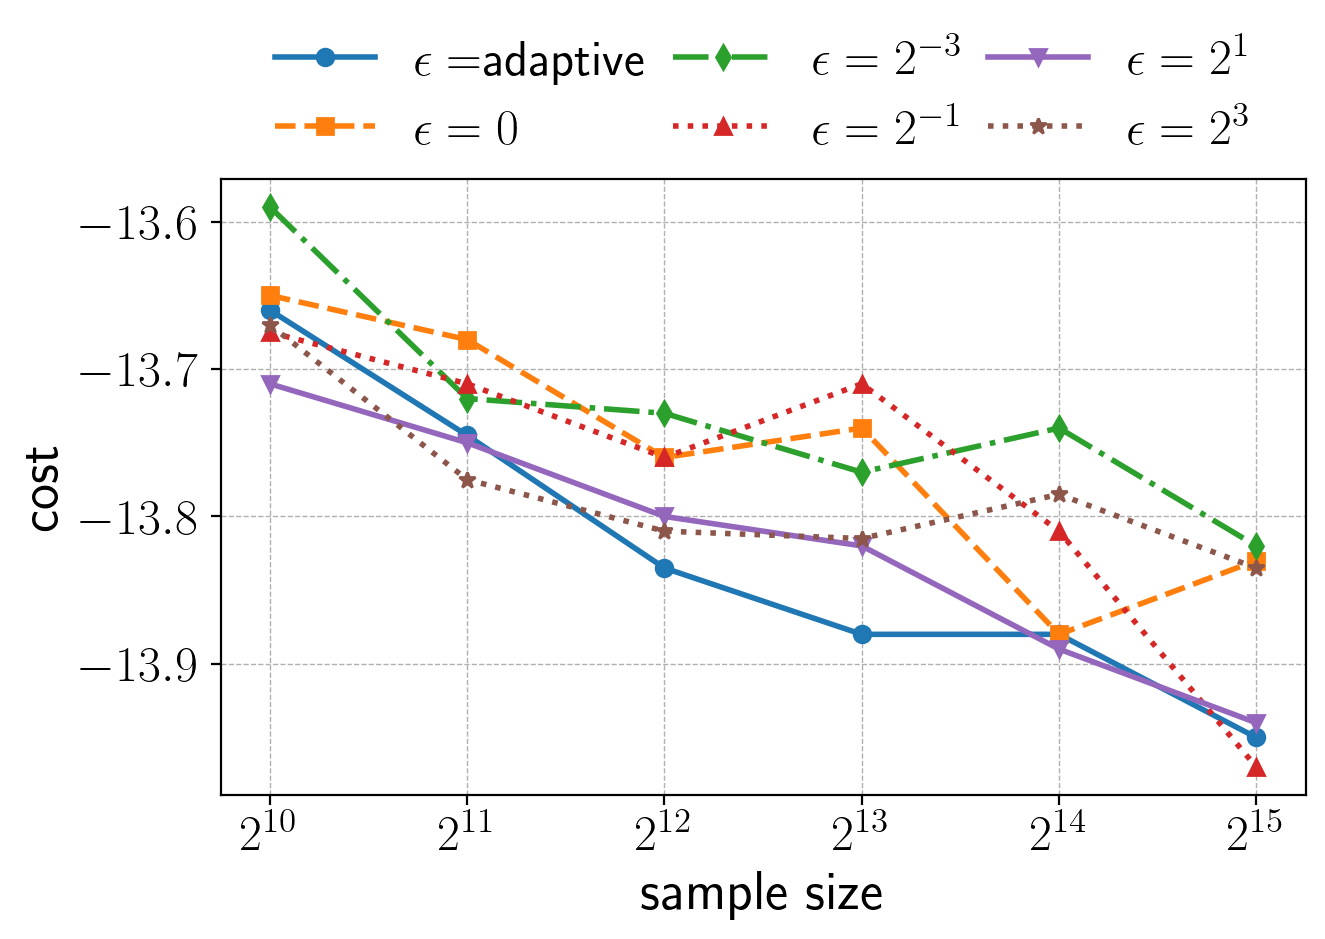

In [327]:
# epsilon profile (one figure for single solution, one figure for multi solution)

epsilon_list = [0,0.125, 0.5, 2, 8]
sample_number = [2**i for i in range(10, 16)]

# the one with multiple solution (Figure 1b/8a)
with open("./profiling/obj_lists_epsilon_multiple.json", "r") as f:
    obj_lists = json.load(f)

print(obj_lists.keys())

SAA_obj_list = obj_lists["SAA_obj_list"]
SAA_obj_avg = obj_lists["SAA_obj_avg"]
bagging_alg1_obj_list = obj_lists["bagging_alg1_obj_list"]
bagging_alg1_obj_avg = obj_lists["bagging_alg1_obj_avg"]
bagging_alg3_obj_list = obj_lists["bagging_alg3_obj_list"]
bagging_alg3_obj_avg = obj_lists["bagging_alg3_obj_avg"]
bagging_alg4_obj_list = obj_lists["bagging_alg4_obj_list"]
bagging_alg4_obj_avg = obj_lists["bagging_alg4_obj_avg"]

# plotting for ReBAG
fig, ax = plt.subplots(figsize = (7, 4), dpi=200)

curve = [-item for item in bagging_alg3_obj_avg[-1]]

ind = 0
ax.plot(sample_number, curve, marker=markers[ind % len(markers)],
            linestyle=lineStyles[ind % len(lineStyles)], linewidth=2,
            color=default_colors[ind % len(default_colors)],
        label=f"$\epsilon=$adaptive")
ind += 1

for _, epsilon in enumerate(epsilon_list):
    if epsilon_list[_] not in [0, 1.0]:
        label_name = f"$\epsilon=2^{{{int(np.log2(epsilon_list[_]))}}}$"
    else:
        label_name = f"$\epsilon={int(epsilon_list[_])}$"
    curve = [-item for item in bagging_alg3_obj_avg[_]]
    ax.plot(sample_number, curve, marker=markers[ind % len(markers)],
            linestyle=lineStyles[ind % len(lineStyles)], linewidth=2,
            color=default_colors[ind % len(default_colors)], label=label_name)        
    ind += 1

ax.set_xlabel('sample size', size=20)
ax.set_ylabel('cost', size=20)
ax.set_xscale('log', base = 2)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), fontsize=18, ncol=3, frameon=False, bbox_transform=ax.transAxes, columnspacing=0.5)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig("./profiling/profiling_alg3_epsilon_multiple.png", dpi = 500, bbox_inches='tight')
plt.show()


# plotting for ReBAG-S
fig, ax = plt.subplots(figsize = (7, 4), dpi=200)

curve = [-item for item in bagging_alg4_obj_avg[-1]]
ind = 0
ax.plot(sample_number, curve,  marker=markers[ind % len(markers)],
            linestyle=lineStyles[ind % len(lineStyles)], linewidth=2,
            color=default_colors[ind % len(default_colors)],
        label=f"$\epsilon=$adaptive")
ind += 1

for _, epsilon in enumerate(epsilon_list):
    if epsilon_list[_] not in [0, 1.0]:
        label_name = f"$\epsilon=2^{{{int(np.log2(epsilon_list[_]))}}}$"
    else:
        label_name = f"$\epsilon={int(epsilon_list[_])}$"
    curve = [-item for item in bagging_alg4_obj_avg[_]]
    ax.plot(sample_number, curve, marker=markers[ind % len(markers)],
            linestyle=lineStyles[ind % len(lineStyles)], linewidth=2,
            color=default_colors[ind % len(default_colors)], label=label_name)
    ind += 1

ax.set_xlabel('sample size', size=20)
ax.set_ylabel('cost', size=20)
ax.set_xscale('log', base = 2)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), fontsize=18, ncol=3, frameon=False, bbox_transform=ax.transAxes, columnspacing=0.5)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig("./profiling/profiling_alg4_epsilon_multiple.png", dpi = 500, bbox_inches='tight')
plt.show()

dict_keys(['SAA_obj_list', 'SAA_obj_avg', 'bagging_alg1_obj_list', 'bagging_alg1_obj_avg', 'bagging_alg3_obj_list', 'bagging_alg3_obj_avg', 'bagging_alg4_obj_list', 'bagging_alg4_obj_avg'])


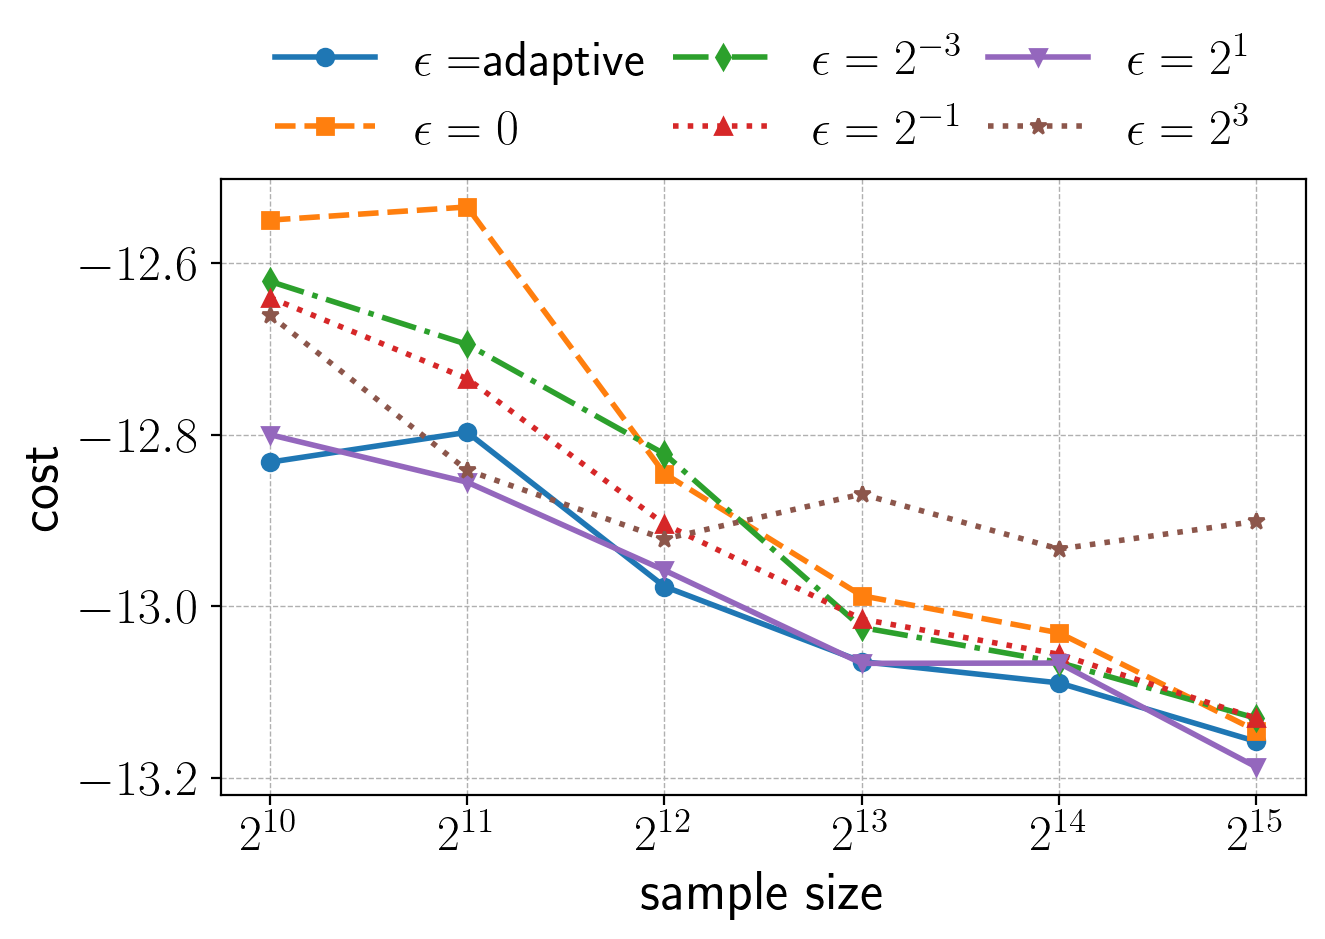

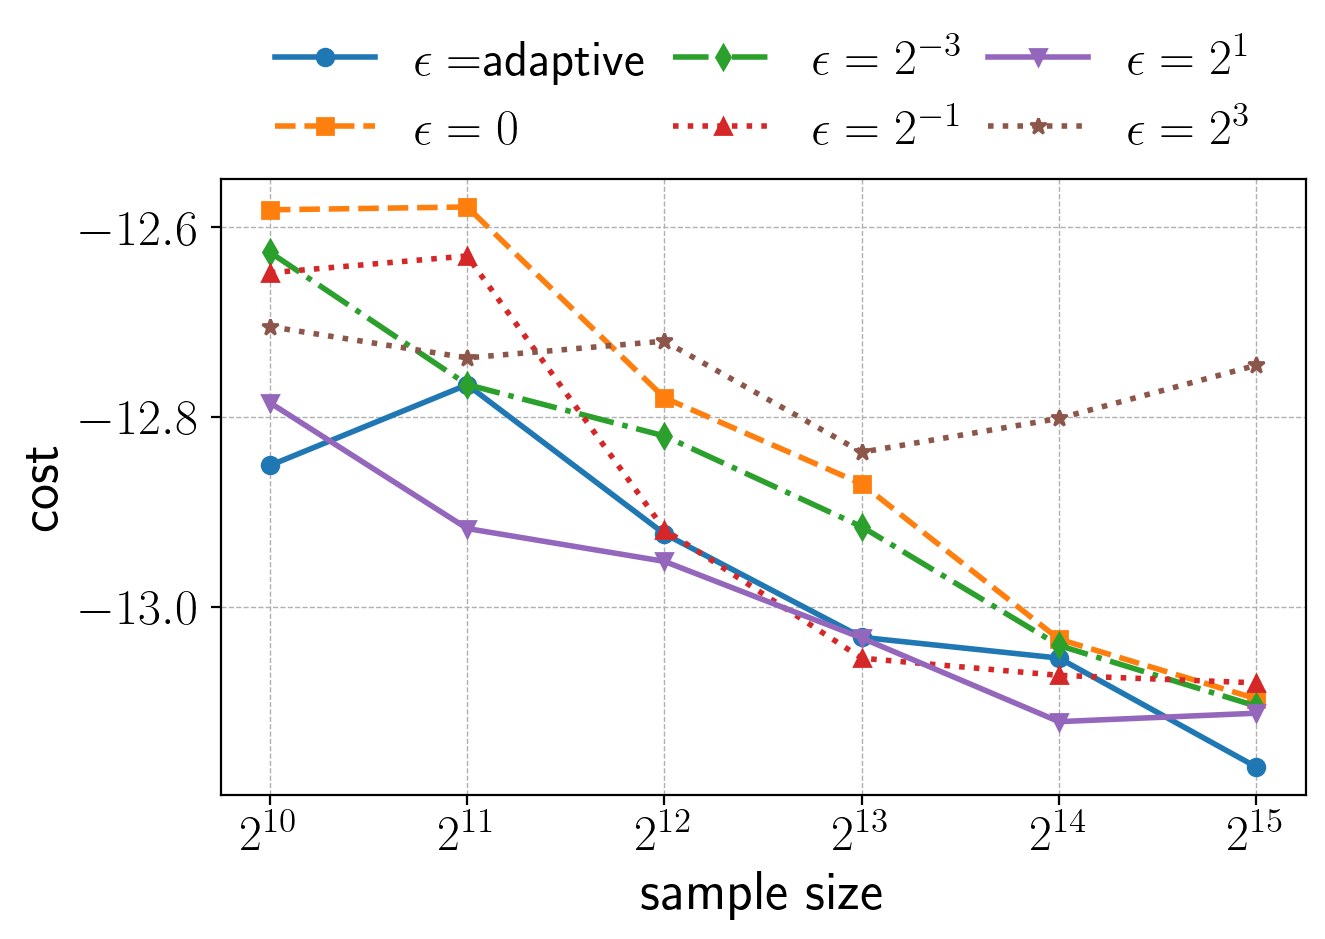

In [328]:
# epsilon profile (one figure for single solution, one figure for multi solution)

epsilon_list = [0,0.125, 0.5, 2, 8]
sample_number = [2**i for i in range(10, 16)]

# the one with single solution (Figure 1c/8c)
with open("./profiling/obj_lists_epsilon_single.json", "r") as f:
    obj_lists = json.load(f)

print(obj_lists.keys())

SAA_obj_list = obj_lists["SAA_obj_list"]
SAA_obj_avg = obj_lists["SAA_obj_avg"]
bagging_alg1_obj_list = obj_lists["bagging_alg1_obj_list"]
bagging_alg1_obj_avg = obj_lists["bagging_alg1_obj_avg"]
bagging_alg3_obj_list = obj_lists["bagging_alg3_obj_list"]
bagging_alg3_obj_avg = obj_lists["bagging_alg3_obj_avg"]
bagging_alg4_obj_list = obj_lists["bagging_alg4_obj_list"]
bagging_alg4_obj_avg = obj_lists["bagging_alg4_obj_avg"]


# plotting for ReBAG
fig, ax = plt.subplots(figsize = (7, 4), dpi=200)

curve = [-item for item in bagging_alg3_obj_avg[-1]]

ind = 0
ax.plot(sample_number, curve, marker=markers[ind % len(markers)],
            linestyle=lineStyles[ind % len(lineStyles)], linewidth=2,
            color=default_colors[ind % len(default_colors)],
        label=f"$\epsilon=$adaptive")
ind += 1

for _, epsilon in enumerate(epsilon_list):
    if epsilon_list[_] not in [0, 1.0]:
        label_name = f"$\epsilon=2^{{{int(np.log2(epsilon_list[_]))}}}$"
    else:
        label_name = f"$\epsilon={int(epsilon_list[_])}$"
    curve = [-item for item in bagging_alg3_obj_avg[_]]
    ax.plot(sample_number, curve, marker=markers[ind % len(markers)],
            linestyle=lineStyles[ind % len(lineStyles)], linewidth=2,
            color=default_colors[ind % len(default_colors)], label=label_name)        
    ind += 1

ax.set_xlabel('sample size', size=20)
ax.set_ylabel('cost', size=20)
ax.set_xscale('log', base = 2)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), fontsize=18, ncol=3, frameon=False, bbox_transform=ax.transAxes, columnspacing=0.5)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig("./profiling/profiling_alg3_epsilon_single.png", dpi = 500, bbox_inches='tight')
plt.show()


# plotting for ReBAG-S
fig, ax = plt.subplots(figsize = (7, 4), dpi=200)

curve = [-item for item in bagging_alg4_obj_avg[-1]]
ind = 0
ax.plot(sample_number, curve,  marker=markers[ind % len(markers)],
            linestyle=lineStyles[ind % len(lineStyles)], linewidth=2,
            color=default_colors[ind % len(default_colors)],
        label=f"$\epsilon=$adaptive")
ind += 1

for _, epsilon in enumerate(epsilon_list):
    if epsilon_list[_] not in [0, 1.0]:
        label_name = f"$\epsilon=2^{{{int(np.log2(epsilon_list[_]))}}}$"
    else:
        label_name = f"$\epsilon={int(epsilon_list[_])}$"
    curve = [-item for item in bagging_alg4_obj_avg[_]]
    ax.plot(sample_number, curve, marker=markers[ind % len(markers)],
            linestyle=lineStyles[ind % len(lineStyles)], linewidth=2,
            color=default_colors[ind % len(default_colors)], label=label_name)
    ind += 1

ax.set_xlabel('sample size', size=20)
ax.set_ylabel('cost', size=20)
ax.set_xscale('log', base = 2)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), fontsize=18, ncol=3, frameon=False, bbox_transform=ax.transAxes, columnspacing=0.5)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig("./profiling/profiling_alg4_epsilon_single.png", dpi = 500, bbox_inches='tight')
plt.show()

dict_keys(['SAA_obj_list', 'SAA_obj_avg', 'bagging_alg1_obj_list', 'bagging_alg1_obj_avg', 'bagging_alg3_obj_list', 'bagging_alg3_obj_avg', 'bagging_alg4_obj_list', 'bagging_alg4_obj_avg'])


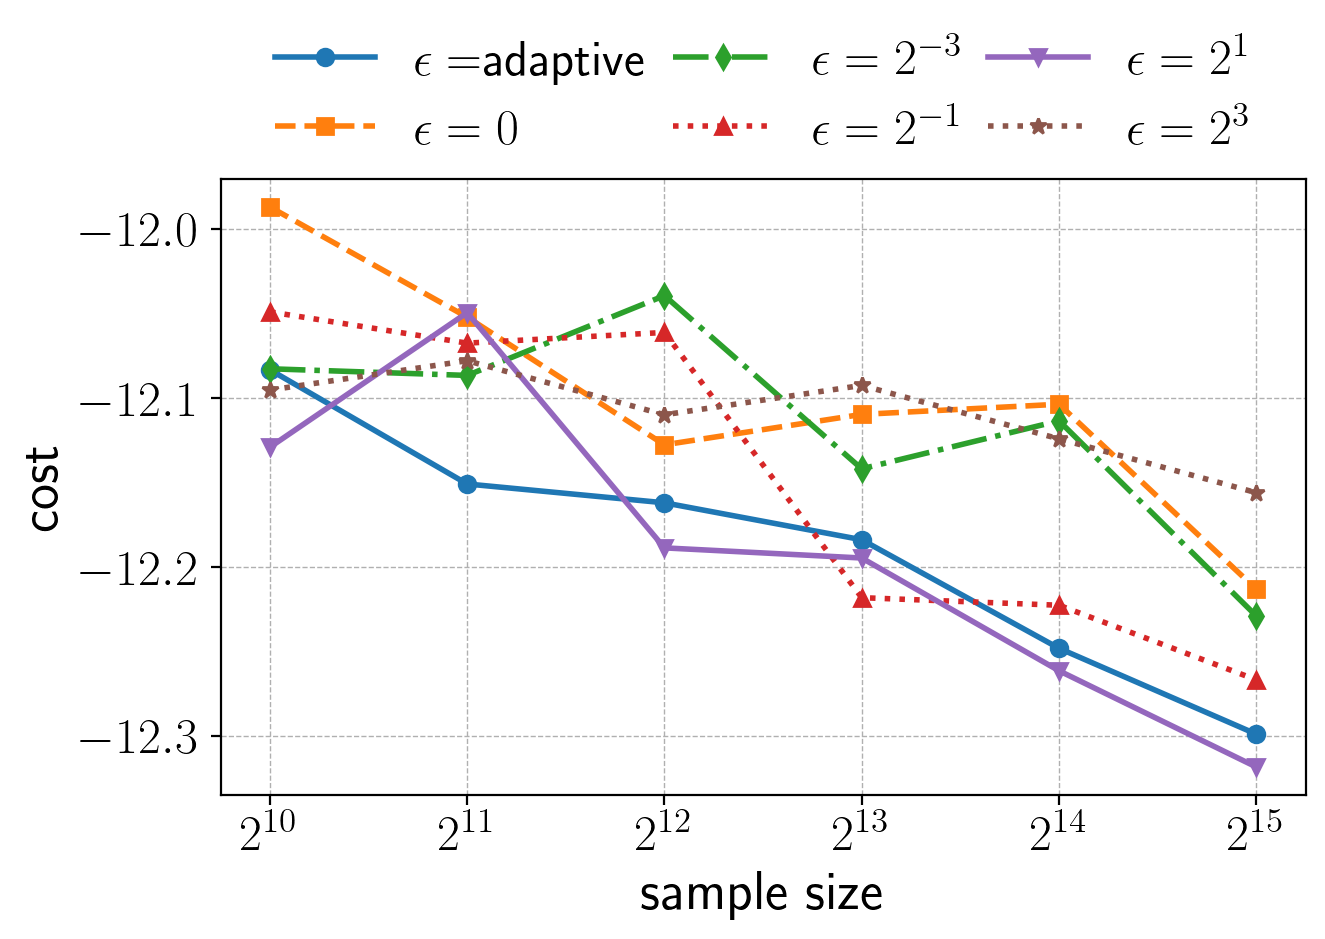

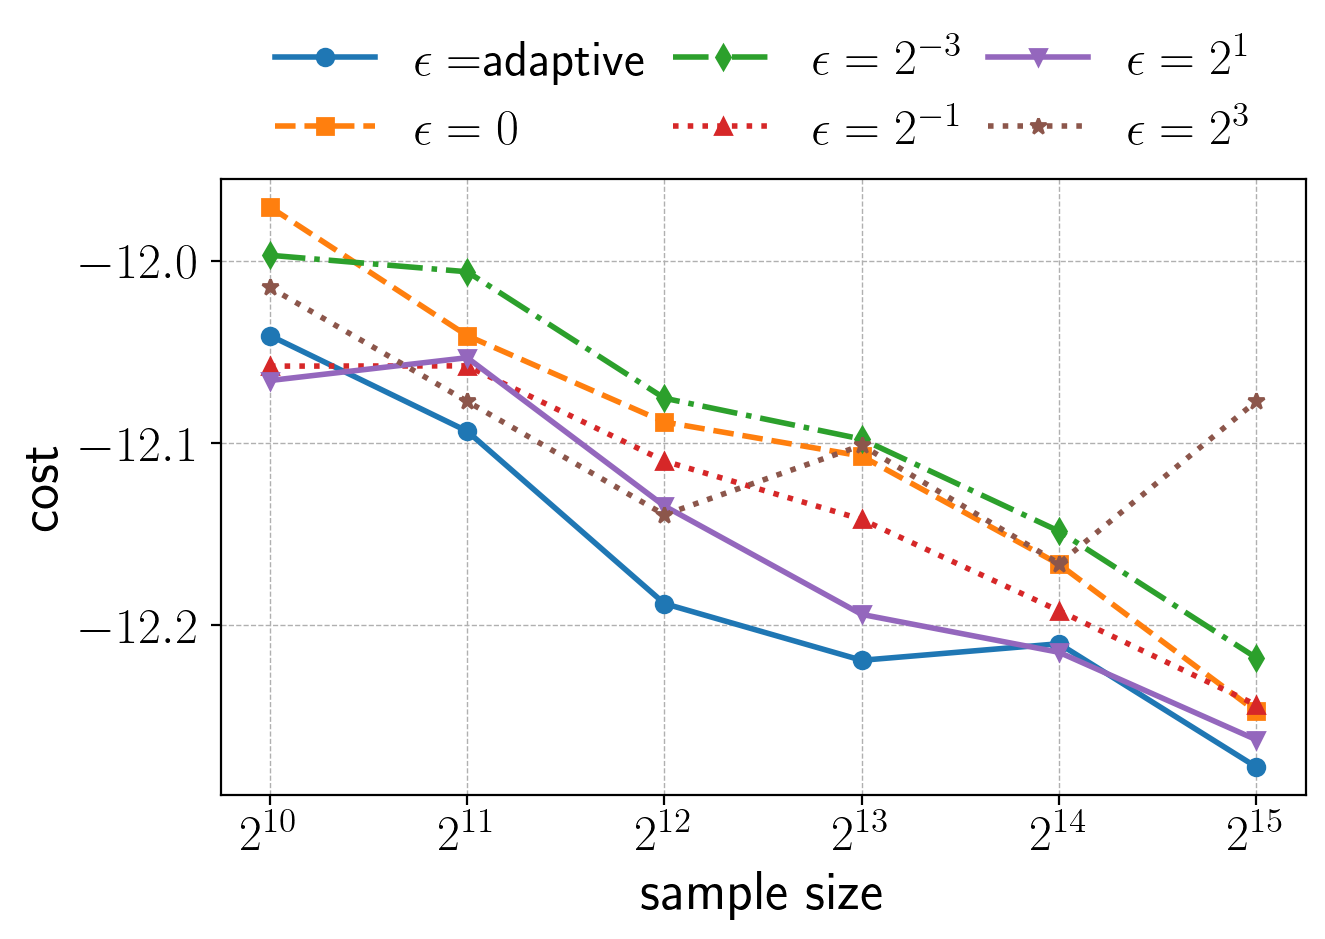

In [329]:
# epsilon profile (one figure for single solution, one figure for multi solution)

epsilon_list = [0,0.125, 0.5, 2, 8]
sample_number = [2**i for i in range(10, 16)]

# the one with multiple near optimal solutions (Figure 6c/8b)
with open("./profiling/obj_lists_epsilon_near.json", "r") as f:
    obj_lists = json.load(f)

print(obj_lists.keys())

SAA_obj_list = obj_lists["SAA_obj_list"]
SAA_obj_avg = obj_lists["SAA_obj_avg"]
bagging_alg1_obj_list = obj_lists["bagging_alg1_obj_list"]
bagging_alg1_obj_avg = obj_lists["bagging_alg1_obj_avg"]
bagging_alg3_obj_list = obj_lists["bagging_alg3_obj_list"]
bagging_alg3_obj_avg = obj_lists["bagging_alg3_obj_avg"]
bagging_alg4_obj_list = obj_lists["bagging_alg4_obj_list"]
bagging_alg4_obj_avg = obj_lists["bagging_alg4_obj_avg"]


# plotting for ReBAG
fig, ax = plt.subplots(figsize = (7, 4), dpi=200)

curve = [-item for item in bagging_alg3_obj_avg[-1]]

ind = 0
ax.plot(sample_number, curve, marker=markers[ind % len(markers)],
            linestyle=lineStyles[ind % len(lineStyles)], linewidth=2,
            color=default_colors[ind % len(default_colors)],
        label=f"$\epsilon=$adaptive")
ind += 1

for _, epsilon in enumerate(epsilon_list):
    if epsilon_list[_] not in [0, 1.0]:
        label_name = f"$\epsilon=2^{{{int(np.log2(epsilon_list[_]))}}}$"
    else:
        label_name = f"$\epsilon={int(epsilon_list[_])}$"
    curve = [-item for item in bagging_alg3_obj_avg[_]]
    ax.plot(sample_number, curve, marker=markers[ind % len(markers)],
            linestyle=lineStyles[ind % len(lineStyles)], linewidth=2,
            color=default_colors[ind % len(default_colors)], label=label_name)        
    ind += 1

ax.set_xlabel('sample size', size=20)
ax.set_ylabel('cost', size=20)
ax.set_xscale('log', base = 2)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), fontsize=18, ncol=3, frameon=False, bbox_transform=ax.transAxes, columnspacing=0.5)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig("./profiling/profiling_alg3_epsilon_near.png", dpi = 500, bbox_inches='tight')
plt.show()


# plotting for ReBAG-S
fig, ax = plt.subplots(figsize = (7, 4), dpi=200)

curve = [-item for item in bagging_alg4_obj_avg[-1]]
ind = 0
ax.plot(sample_number, curve,  marker=markers[ind % len(markers)],
            linestyle=lineStyles[ind % len(lineStyles)], linewidth=2,
            color=default_colors[ind % len(default_colors)],
        label=f"$\epsilon=$adaptive")
ind += 1

for _, epsilon in enumerate(epsilon_list):
    if epsilon_list[_] not in [0, 1.0]:
        label_name = f"$\epsilon=2^{{{int(np.log2(epsilon_list[_]))}}}$"
    else:
        label_name = f"$\epsilon={int(epsilon_list[_])}$"
    curve = [-item for item in bagging_alg4_obj_avg[_]]
    ax.plot(sample_number, curve, marker=markers[ind % len(markers)],
            linestyle=lineStyles[ind % len(lineStyles)], linewidth=2,
            color=default_colors[ind % len(default_colors)], label=label_name)
    ind += 1

ax.set_xlabel('sample size', size=20)
ax.set_ylabel('cost', size=20)
ax.set_xscale('log', base = 2)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), fontsize=18, ncol=3, frameon=False, bbox_transform=ax.transAxes, columnspacing=0.5)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig("./profiling/profiling_alg4_epsilon_near.png", dpi = 500, bbox_inches='tight')
plt.show()

# Algorithm comparison with SAA

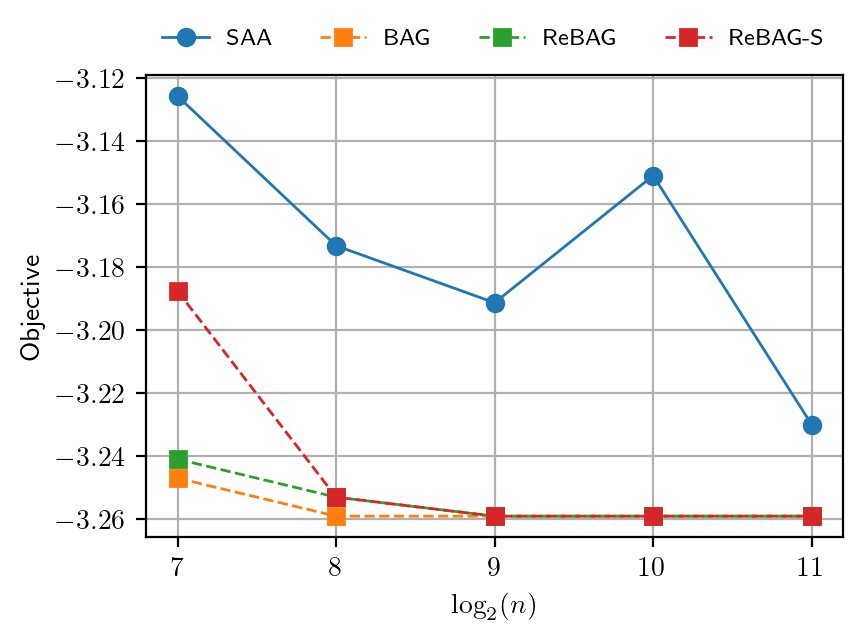

In [113]:
# SSKP (Figure 2a)
with open("./SAA_comparison/obj_lists_SSKP.json", "r") as f:
    obj_lists = json.load(f)
# print(obj_lists.keys())
SAA_obj_list = obj_lists["SAA_obj_list"]
SAA_obj_avg = obj_lists["SAA_obj_avg"]
bagging_alg1_obj_list = obj_lists["bagging_alg1_obj_list"]
bagging_alg1_obj_avg = obj_lists["bagging_alg1_obj_avg"]
bagging_alg3_obj_list = obj_lists["bagging_alg3_obj_list"]
bagging_alg3_obj_avg = obj_lists["bagging_alg3_obj_avg"]
bagging_alg4_obj_list = obj_lists["bagging_alg4_obj_list"]
bagging_alg4_obj_avg = obj_lists["bagging_alg4_obj_avg"]
# B_list = [200], k_list = [10], B12_list = [(20,200)]
sample_number = [2**i for i in range(7, 13)]

fig, ax = plt.subplots(figsize = (4.5, 3), dpi=200)

curve_SAA = [-item for item in SAA_obj_avg]
ax.plot(np.log2(sample_number)[:-1], curve_SAA[:-1], marker = 'o', linestyle = '-', linewidth = 1, label='SAA')

curve_alg1 = [-item for item in bagging_alg1_obj_avg[0][0]]
ax.plot(np.log2(sample_number)[:-1], curve_alg1[:-1], marker = 's', linestyle = '--', linewidth = 1, label='BAG')

curve_alg3 = [-item for item in bagging_alg3_obj_avg[0][0]]
ax.plot(np.log2(sample_number)[:-1], curve_alg3[:-1], marker = 's', linestyle = '--', linewidth = 1, label='ReBAG')

curve_alg4 = [-item for item in bagging_alg4_obj_avg[0][0]]
ax.plot(np.log2(sample_number)[:-1], curve_alg4[:-1], marker = 's', linestyle = '--', linewidth = 1, label='ReBAG-S')


ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective')
ax.legend(fontsize = 'small',loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol=4, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True)
plt.savefig("./SAA_comparison/SAA_comparison_SSKP.png", bbox_inches = "tight")
plt.show()

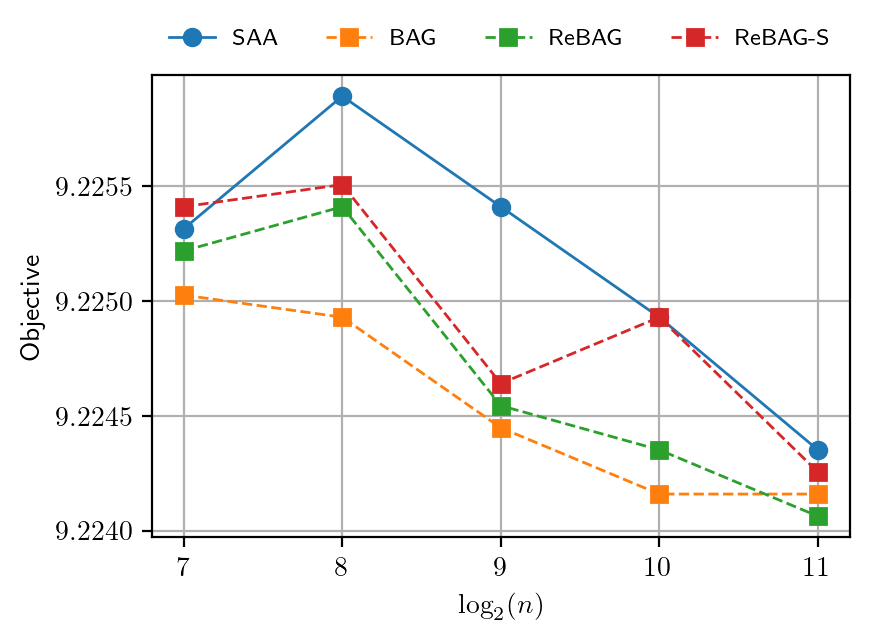

In [114]:
# network (Figure 2b)
with open("./SAA_comparison/obj_lists_network.json", "r") as f:
    obj_lists = json.load(f)
SAA_obj_list = obj_lists["SAA_obj_list"]
SAA_obj_avg = obj_lists["SAA_obj_avg"]
bagging_alg1_obj_list = obj_lists["bagging_alg1_obj_list"]
bagging_alg1_obj_avg = obj_lists["bagging_alg1_obj_avg"]
bagging_alg3_obj_list = obj_lists["bagging_alg3_obj_list"]
bagging_alg3_obj_avg = obj_lists["bagging_alg3_obj_avg"]
bagging_alg4_obj_list = obj_lists["bagging_alg4_obj_list"]
bagging_alg4_obj_avg = obj_lists["bagging_alg4_obj_avg"]
# B_list = [200], k_list = [0.1, 10], B12_list = [(20,200)]
sample_number = [2**i for i in range(7, 15)]

fig, ax = plt.subplots(figsize = (4.5, 3), dpi=200)

curve_SAA = [-item for item in SAA_obj_avg]
ax.plot(np.log2(sample_number)[:-3], curve_SAA[:-3], marker = 'o', linestyle = '-', linewidth = 1, label='SAA')

curve_alg1 = [-item for item in bagging_alg1_obj_avg[0][1]]
ax.plot(np.log2(sample_number)[:-3], curve_alg1[:-3], marker = 's', linestyle = '--', linewidth = 1, label='BAG')

curve_alg3 = [-item for item in bagging_alg3_obj_avg[0][1]]
ax.plot(np.log2(sample_number)[:-3], curve_alg3[:-3], marker = 's', linestyle = '--', linewidth = 1, label='ReBAG')

curve_alg4 = [-item for item in bagging_alg4_obj_avg[0][1]]
ax.plot(np.log2(sample_number)[:-3], curve_alg4[:-3], marker = 's', linestyle = '--', linewidth = 1, label='ReBAG-S')

ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective')
ax.legend(fontsize = 'small',loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol=4, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True)
plt.savefig("./SAA_comparison/SAA_comparison_network.png", bbox_inches = "tight")
plt.show()

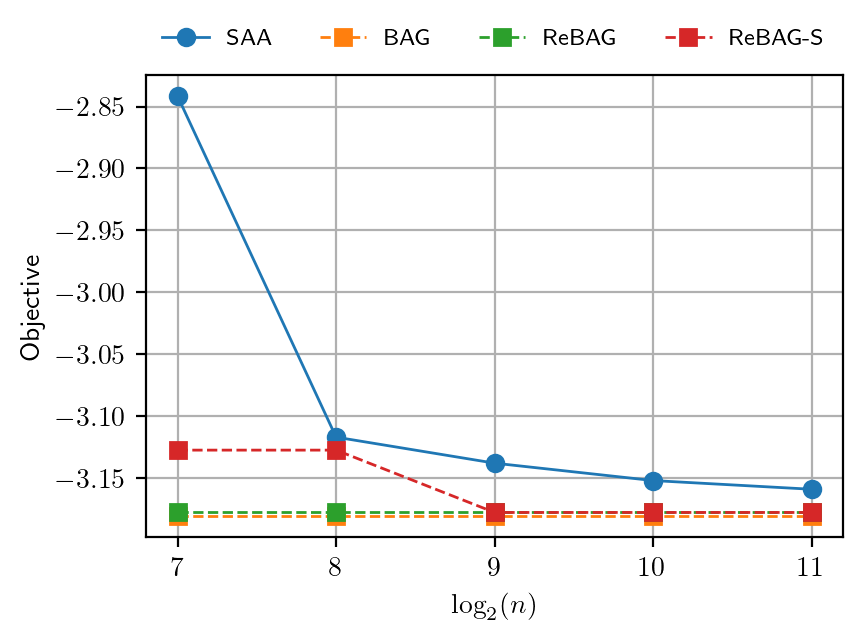

In [115]:
# portfolio (Figure 2c)
with open("./SAA_comparison/obj_lists_portfolio.json", "r") as f:
    obj_lists = json.load(f)
SAA_obj_list = obj_lists["SAA_obj_list"]
SAA_obj_avg = obj_lists["SAA_obj_avg"]
bagging_alg1_obj_list = obj_lists["bagging_alg1_obj_list"]
bagging_alg1_obj_avg = obj_lists["bagging_alg1_obj_avg"]
bagging_alg3_obj_list = obj_lists["bagging_alg3_obj_list"]
bagging_alg3_obj_avg = obj_lists["bagging_alg3_obj_avg"]
bagging_alg4_obj_list = obj_lists["bagging_alg4_obj_list"]
bagging_alg4_obj_avg = obj_lists["bagging_alg4_obj_avg"]
# B_list = [200,400], k_list = [0.1, 2, 10, 50], B12_list = [(20,200), (20,400)]
sample_number = [2**i for i in range(7, 14)]

fig, ax = plt.subplots(figsize = (4.5, 3), dpi=200)

curve_SAA = [-item for item in SAA_obj_avg]
ax.plot(np.log2(sample_number)[:-2], curve_SAA[:-2], marker = 'o', linestyle = '-', linewidth = 1, label='SAA')

curve_alg1 = [-item-0.003 for item in bagging_alg1_obj_avg[0][2]]
ax.plot(np.log2(sample_number)[:-2], curve_alg1[:-2], marker = 's', linestyle = '--', linewidth = 1, label='BAG')

curve_alg3 = [-item for item in bagging_alg3_obj_avg[0][2]]
ax.plot(np.log2(sample_number)[:-2], curve_alg3[:-2], marker = 's', linestyle = '--', linewidth = 1, label='ReBAG')

curve_alg4 = [-item for item in bagging_alg4_obj_avg[0][2]]
ax.plot(np.log2(sample_number)[:-2], curve_alg4[:-2], marker = 's', linestyle = '--', linewidth = 1, label='ReBAG-S')

ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective')
ax.legend(fontsize = 'small',loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol=4, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True)
plt.savefig("./SAA_comparison/SAA_comparison_portfolio.png", bbox_inches = "tight")
plt.show()

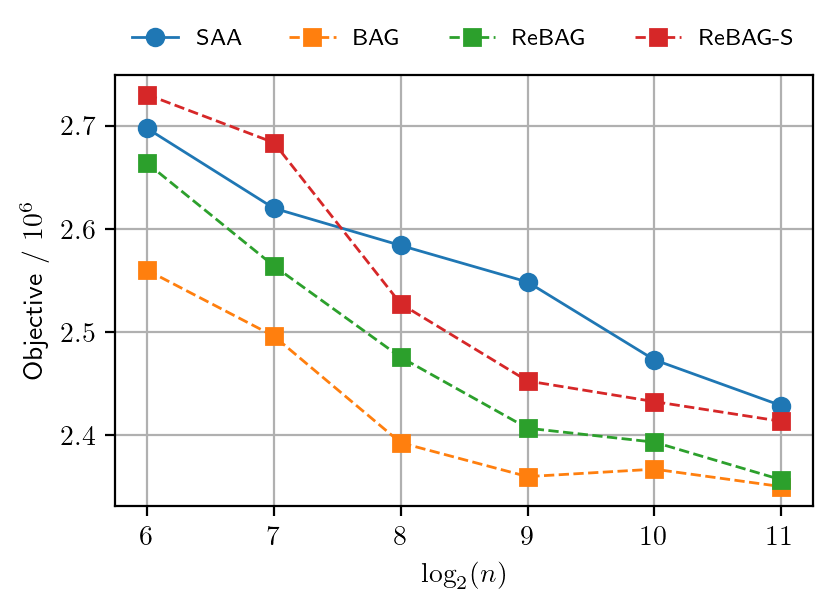

In [118]:
# model selection (Figure 2d)
with open("./SAA_comparison/obj_lists_LASSO.json", "r") as f:
    obj_lists = json.load(f)
SAA_obj_list = obj_lists["SAA_obj_list"]
SAA_obj_avg = obj_lists["SAA_obj_avg"]
bagging_alg1_obj_list = obj_lists["bagging_alg1_obj_list"]
bagging_alg1_obj_avg = obj_lists["bagging_alg1_obj_avg"]
bagging_alg3_obj_list = obj_lists["bagging_alg3_obj_list"]
bagging_alg3_obj_avg = obj_lists["bagging_alg3_obj_avg"]
bagging_alg4_obj_list = obj_lists["bagging_alg4_obj_list"]
bagging_alg4_obj_avg = obj_lists["bagging_alg4_obj_avg"]


sample_number = [2**i for i in range(5, 12)]
fig, ax = plt.subplots(figsize = (4.5, 2.8), dpi=200)

curve_SAA = [item/1e6 for item in SAA_obj_avg[1:]]
ax.plot(np.log2(sample_number)[1:], curve_SAA, marker = 'o', linestyle = '-', linewidth = 1, label='SAA')

curve_alg1 = [item/1e6 for item in bagging_alg1_obj_avg[0][0][1:]]
ax.plot(np.log2(sample_number)[1:], curve_alg1, marker = 's', linestyle = '--', linewidth = 1, label='BAG')

curve_alg3 = [item/1e6 for item in bagging_alg3_obj_avg[0][0][1:]]
ax.plot(np.log2(sample_number)[1:], curve_alg3, marker = 's', linestyle = '--', linewidth = 1, label='ReBAG')

curve_alg4 = [item/1e6 for item in bagging_alg4_obj_avg[0][0][1:]]
ax.plot(np.log2(sample_number)[1:], curve_alg4, marker = 's', linestyle = '--', linewidth = 1, label='ReBAG-S')

ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective / $10^{6}$')
ax.legend(fontsize = 'small',loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol=4, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True)
plt.savefig("./SAA_comparison/SAA_comparison_LASSO.png", bbox_inches = "tight")
plt.show()

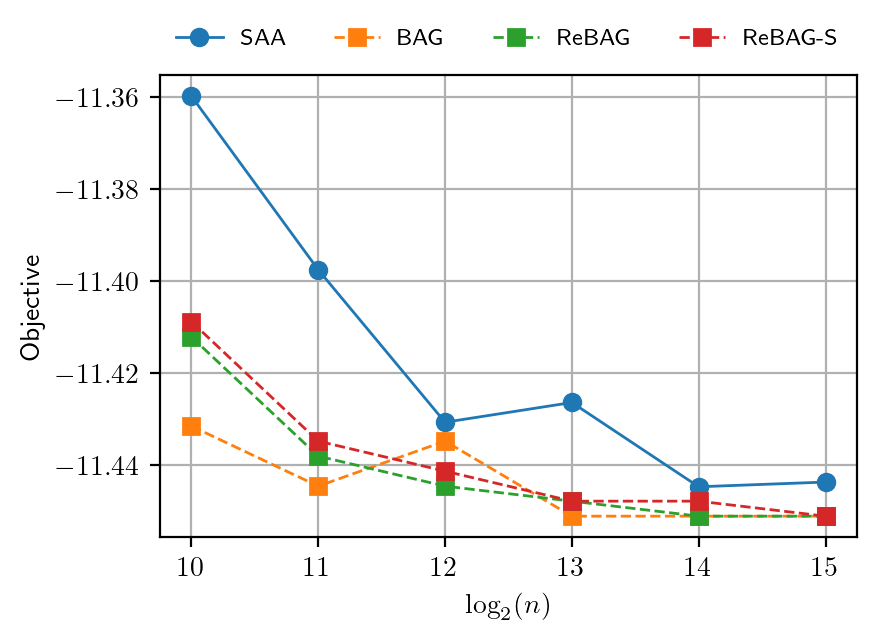

In [119]:
# maximum weight bipartite matching (Figure 2e)
with open("./SAA_comparison/obj_lists_matching.json", "r") as f:
    obj_lists = json.load(f)
SAA_obj_list = obj_lists["SAA_obj_list"]
SAA_obj_avg = obj_lists["SAA_obj_avg"]
bagging_alg1_obj_list = obj_lists["bagging_alg1_obj_list"]
bagging_alg1_obj_avg = obj_lists["bagging_alg1_obj_avg"]
bagging_alg3_obj_list = obj_lists["bagging_alg3_obj_list"]
bagging_alg3_obj_avg = obj_lists["bagging_alg3_obj_avg"]
bagging_alg4_obj_list = obj_lists["bagging_alg4_obj_list"]
bagging_alg4_obj_avg = obj_lists["bagging_alg4_obj_avg"]

sample_number = [2**i for i in range(10, 16)]
fig, ax = plt.subplots(figsize = (4.5, 3), dpi=200)

curve_SAA = [-item for item in SAA_obj_avg]
ax.plot(np.log2(sample_number), curve_SAA, marker = 'o', linestyle = '-', linewidth = 1, label='SAA')

curve_alg1 = [-item for item in bagging_alg1_obj_avg[0][0]]
ax.plot(np.log2(sample_number), curve_alg1, marker = 's', linestyle = '--', linewidth = 1, label='BAG')

curve_alg3 = [-item for item in bagging_alg3_obj_avg[0][0]]
ax.plot(np.log2(sample_number), curve_alg3, marker = 's', linestyle = '--', linewidth = 1, label='ReBAG')

curve_alg4 = [-item for item in bagging_alg4_obj_avg[0][0]]
ax.plot(np.log2(sample_number), curve_alg4, marker = 's', linestyle = '--', linewidth = 1, label='ReBAG-S')

ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective')
ax.legend(fontsize = 'small',loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol=4, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True)
# plt.savefig("./SAA_comparison/SAA_comparison_matching.png", bbox_inches = "tight")
plt.show()

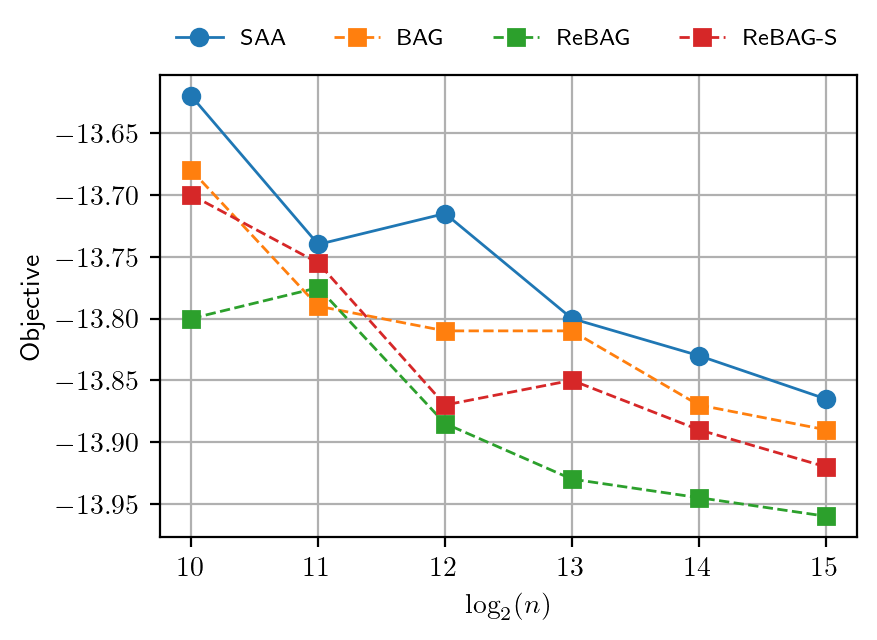

In [120]:
# LP (Figure 2f)
with open("./SAA_comparison/obj_lists_LP.json", "r") as f:
    obj_lists = json.load(f)
SAA_obj_list = obj_lists["SAA_obj_list"]
SAA_obj_avg = obj_lists["SAA_obj_avg"]
bagging_alg1_obj_list = obj_lists["bagging_alg1_obj_list"]
bagging_alg1_obj_avg = obj_lists["bagging_alg1_obj_avg"]
bagging_alg3_obj_list = obj_lists["bagging_alg3_obj_list"]
bagging_alg3_obj_avg = obj_lists["bagging_alg3_obj_avg"]
bagging_alg4_obj_list = obj_lists["bagging_alg4_obj_list"]
bagging_alg4_obj_avg = obj_lists["bagging_alg4_obj_avg"]

sample_number = [2**i for i in range(10, 16)]
fig, ax = plt.subplots(figsize = (4.5, 3), dpi=200)

curve_SAA = [-item for item in SAA_obj_avg]
ax.plot(np.log2(sample_number), curve_SAA, marker = 'o', linestyle = '-', linewidth = 1, label='SAA')

curve_alg1 = [-item for item in bagging_alg1_obj_avg[0][0]]
ax.plot(np.log2(sample_number), curve_alg1, marker = 's', linestyle = '--', linewidth = 1, label='BAG')

curve_alg3 = [-item for item in bagging_alg3_obj_avg[0][0]]
ax.plot(np.log2(sample_number), curve_alg3, marker = 's', linestyle = '--', linewidth = 1, label='ReBAG')

curve_alg4 = [-item for item in bagging_alg4_obj_avg[0][0]]
ax.plot(np.log2(sample_number), curve_alg4, marker = 's', linestyle = '--', linewidth = 1, label='ReBAG-S')

ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective')
ax.legend(fontsize = 'small',loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol=4, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True)
plt.savefig("./SAA_comparison/SAA_comparison_LP.png", bbox_inches = "tight")
plt.show()

# Algorithm comparison with DRO

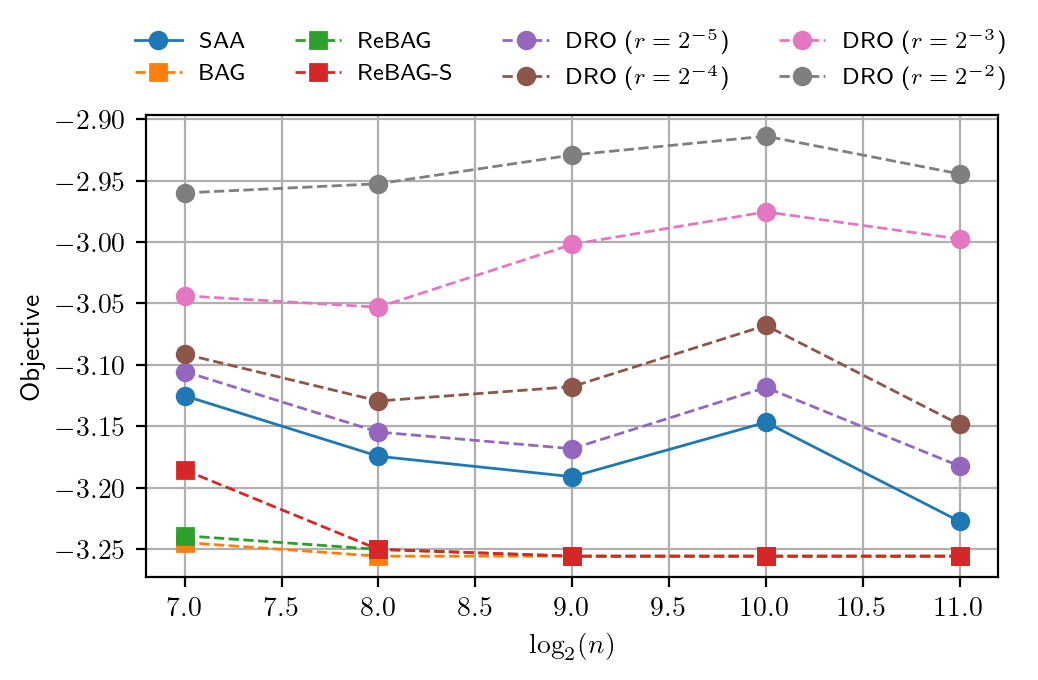

In [121]:
# SSKP (Figure 11a)
with open ("./DRO_comparison/obj_lists_SSKP.json", "r") as f:
    obj_lists = json.load(f)
# print(obj_lists.keys())
SAA_obj_avg = obj_lists["SAA_obj_avg"][:-1]
bagging_alg1_obj_avg = obj_lists["bagging_alg1_obj_avg"][0][0][:-1]
bagging_alg3_obj_avg = obj_lists["bagging_alg3_obj_avg"][0][0][:-1]
bagging_alg4_obj_avg = obj_lists["bagging_alg4_obj_avg"][0][0][:-1]
dro_wasserstein_obj_avg = obj_lists["dro_wasserstein_obj_avg"]
# print(np.shape(dro_wasserstein_obj_avg))

sample_number = [2**i for i in range(7, 12)]
varepsilon_list = [2**i for i in range(-6,2)] # which is the same as r in the paper

fig, ax = plt.subplots(figsize = (5.5, 3), dpi=200)
curve_SAA = [-item for item in SAA_obj_avg]
ax.plot(np.log2(sample_number), curve_SAA, marker = 'o', linestyle = '-', linewidth = 1, label='SAA')

curve_alg1 = [-item for item in bagging_alg1_obj_avg]
ax.plot(np.log2(sample_number), curve_alg1, marker = 's', linestyle = '--', linewidth = 1, label='BAG')

curve_alg3 = [-item for item in bagging_alg3_obj_avg]
ax.plot(np.log2(sample_number), curve_alg3, marker = 's', linestyle = '--', linewidth = 1, label='ReBAG')

curve_alg4 = [-item for item in bagging_alg4_obj_avg]
ax.plot(np.log2(sample_number), curve_alg4, marker = 's', linestyle = '--', linewidth = 1, label='ReBAG-S')

for ind, varepsilon in enumerate(varepsilon_list):
    if varepsilon in [1, 2, 2**-6, 2**-1]:
        continue
    else:
        label_name = f"DRO ($r=2^{{{int(np.log2(varepsilon))}}}$)"
    curve_dro = [-item for item in dro_wasserstein_obj_avg[ind][:-1]]
    ax.plot(np.log2(sample_number), curve_dro, marker = 'o', linestyle = '--', linewidth = 1, label=label_name)    


ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective')
ax.legend(fontsize = 'small',loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol = 4, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True)
plt.savefig("./DRO_comparison/DRO_comparison_SSKP.png", bbox_inches = "tight")
plt.show()

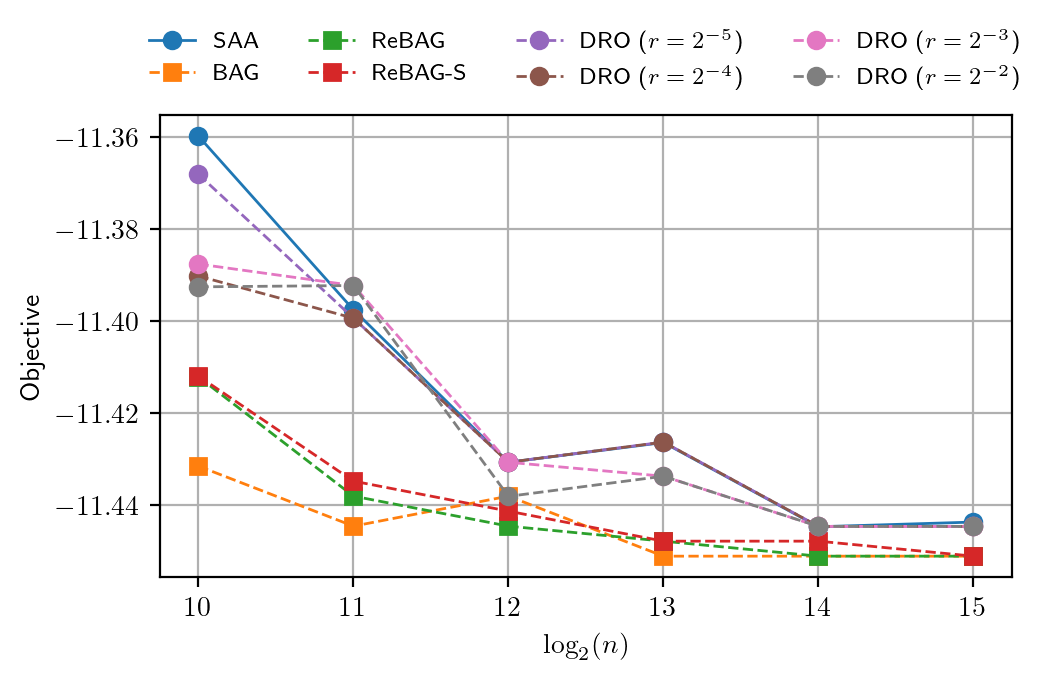

In [122]:
# matching (Figure 11b)
with open ("./DRO_comparison/obj_lists_matching.json", "r") as f:
    obj_lists = json.load(f)
SAA_obj_avg = obj_lists["SAA_obj_avg"]
bagging_alg1_obj_avg = obj_lists["bagging_alg1_obj_avg"][0][0]
bagging_alg3_obj_avg = obj_lists["bagging_alg3_obj_avg"][0][0]
bagging_alg4_obj_avg = obj_lists["bagging_alg4_obj_avg"][0][0]
dro_wasserstein_obj_avg = obj_lists["dro_wasserstein_obj_avg"]
# print(np.shape(dro_wasserstein_obj_avg))

sample_number = [2**i for i in range(10, 16)]
varepsilon_list = [2**i for i in range(-6,2)] # which is the same as r in the paper

fig, ax = plt.subplots(figsize = (5.5, 3), dpi=200)
curve_SAA = [-item for item in SAA_obj_avg]
ax.plot(np.log2(sample_number), curve_SAA, marker = 'o', linestyle = '-', linewidth = 1, label='SAA')

curve_alg1 = [-item for item in bagging_alg1_obj_avg]
ax.plot(np.log2(sample_number), curve_alg1, marker = 's', linestyle = '--', linewidth = 1, label='BAG')

curve_alg3 = [-item for item in bagging_alg3_obj_avg]
ax.plot(np.log2(sample_number), curve_alg3, marker = 's', linestyle = '--', linewidth = 1, label='ReBAG')

curve_alg4 = [-item for item in bagging_alg4_obj_avg]
ax.plot(np.log2(sample_number), curve_alg4, marker = 's', linestyle = '--', linewidth = 1, label='ReBAG-S')

for ind, varepsilon in enumerate(varepsilon_list):
    if varepsilon in [1, 2, 2**-6, 2**-1]:
        continue
    else:
        label_name = f"DRO ($r=2^{{{int(np.log2(varepsilon))}}}$)"
    curve_dro = [-item for item in dro_wasserstein_obj_avg[ind]]
    ax.plot(np.log2(sample_number), curve_dro, marker = 'o', linestyle = '--', linewidth = 1, label=label_name)    


ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective')
ax.legend(fontsize = 'small',loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol = 4, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True)
plt.savefig("./DRO_comparison/DRO_comparison_matching.png", bbox_inches = "tight")
plt.show()

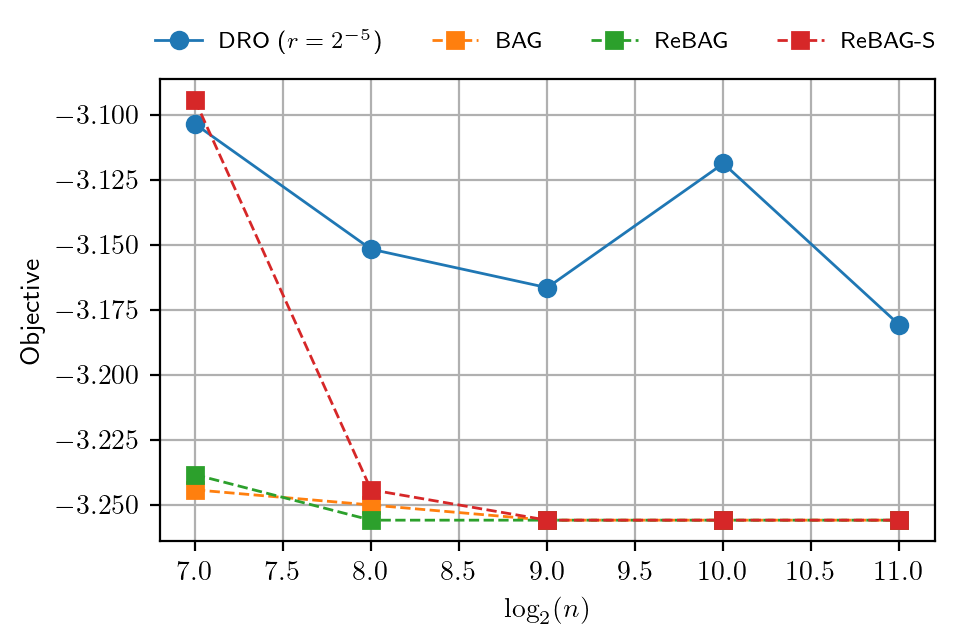

In [123]:
# DRO + bagging in SSKP (Figure 3a)
with open ("./DRO_comparison/obj_lists_bagging_SSKP.json", "r") as f:
    obj_lists = json.load(f)
# print(obj_lists.keys())
dro_wasserstein_obj_avg = obj_lists["dro_wasserstein_obj_avg"]
bagging_alg1_DRO_obj_avg = obj_lists["bagging_alg1_DRO_obj_avg"]
bagging_alg3_DRO_obj_avg = obj_lists["bagging_alg3_DRO_obj_avg"]
bagging_alg4_DRO_obj_avg = obj_lists["bagging_alg4_DRO_obj_avg"]

sample_number = [2**i for i in range(7, 12)]

fig, ax = plt.subplots(figsize = (5, 3), dpi=200)
curve_dro = [-item for item in dro_wasserstein_obj_avg]
ax.plot(np.log2(sample_number), curve_dro, marker = 'o', linestyle = '-', linewidth = 1, label='DRO ($r = 2^{-5}$)')

curve_alg1 = [-item for item in bagging_alg1_DRO_obj_avg]
ax.plot(np.log2(sample_number), curve_alg1, marker = 's', linestyle = '--', linewidth = 1, label='BAG')

curve_alg3 = [-item for item in bagging_alg3_DRO_obj_avg]
ax.plot(np.log2(sample_number), curve_alg3, marker = 's', linestyle = '--', linewidth = 1, label='ReBAG')

curve_alg4 = [-item for item in bagging_alg4_DRO_obj_avg]
ax.plot(np.log2(sample_number), curve_alg4, marker = 's', linestyle = '--', linewidth = 1, label='ReBAG-S')


ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective')
ax.legend(fontsize = 'small',loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol=4, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True)
plt.savefig("./DRO_comparison/DRO_bagging_SSKP.png", bbox_inches = "tight")
plt.show()

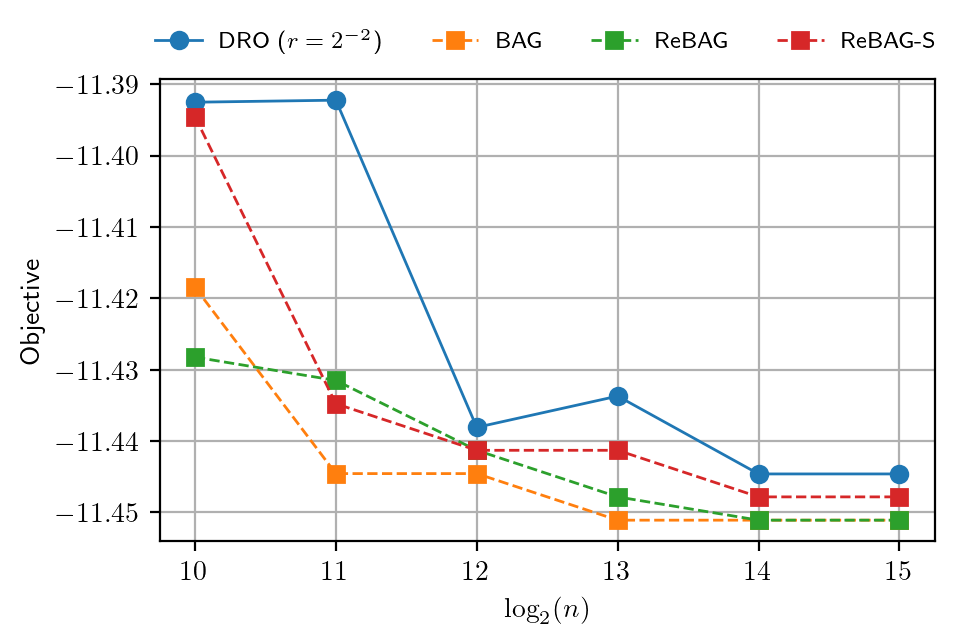

In [124]:
# DRO + bagging in matching (Figure 3b)
with open ("./DRO_comparison/obj_lists_bagging_matching.json", "r") as f:
    obj_lists = json.load(f)
# print(obj_lists.keys())
dro_wasserstein_obj_avg = obj_lists["dro_wasserstein_obj_avg"]
bagging_alg1_DRO_obj_avg = obj_lists["bagging_alg1_DRO_obj_avg"]
bagging_alg3_DRO_obj_avg = obj_lists["bagging_alg3_DRO_obj_avg"]
bagging_alg4_DRO_obj_avg = obj_lists["bagging_alg4_DRO_obj_avg"]

sample_number = [2**i for i in range(10, 16)]

fig, ax = plt.subplots(figsize = (5, 3), dpi=200)
curve_dro = [-item for item in dro_wasserstein_obj_avg]
ax.plot(np.log2(sample_number), curve_dro, marker = 'o', linestyle = '-', linewidth = 1, label='DRO ($r = 2^{-2}$)')

curve_alg1 = [-item for item in bagging_alg1_DRO_obj_avg]
ax.plot(np.log2(sample_number), curve_alg1, marker = 's', linestyle = '--', linewidth = 1, label='BAG')

curve_alg3 = [-item for item in bagging_alg3_DRO_obj_avg]
ax.plot(np.log2(sample_number), curve_alg3, marker = 's', linestyle = '--', linewidth = 1, label='ReBAG')

curve_alg4 = [-item for item in bagging_alg4_DRO_obj_avg]
ax.plot(np.log2(sample_number), curve_alg4, marker = 's', linestyle = '--', linewidth = 1, label='ReBAG-S')


ax.set_xlabel('$\log_2(n)$')
ax.set_ylabel('Objective')
ax.legend(fontsize = 'small',loc='lower center', bbox_to_anchor=(0.5, 1.01), ncol=4, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True)
plt.savefig("./DRO_comparison/DRO_bagging_matching.png", bbox_inches = "tight")
plt.show()

# Probability plots

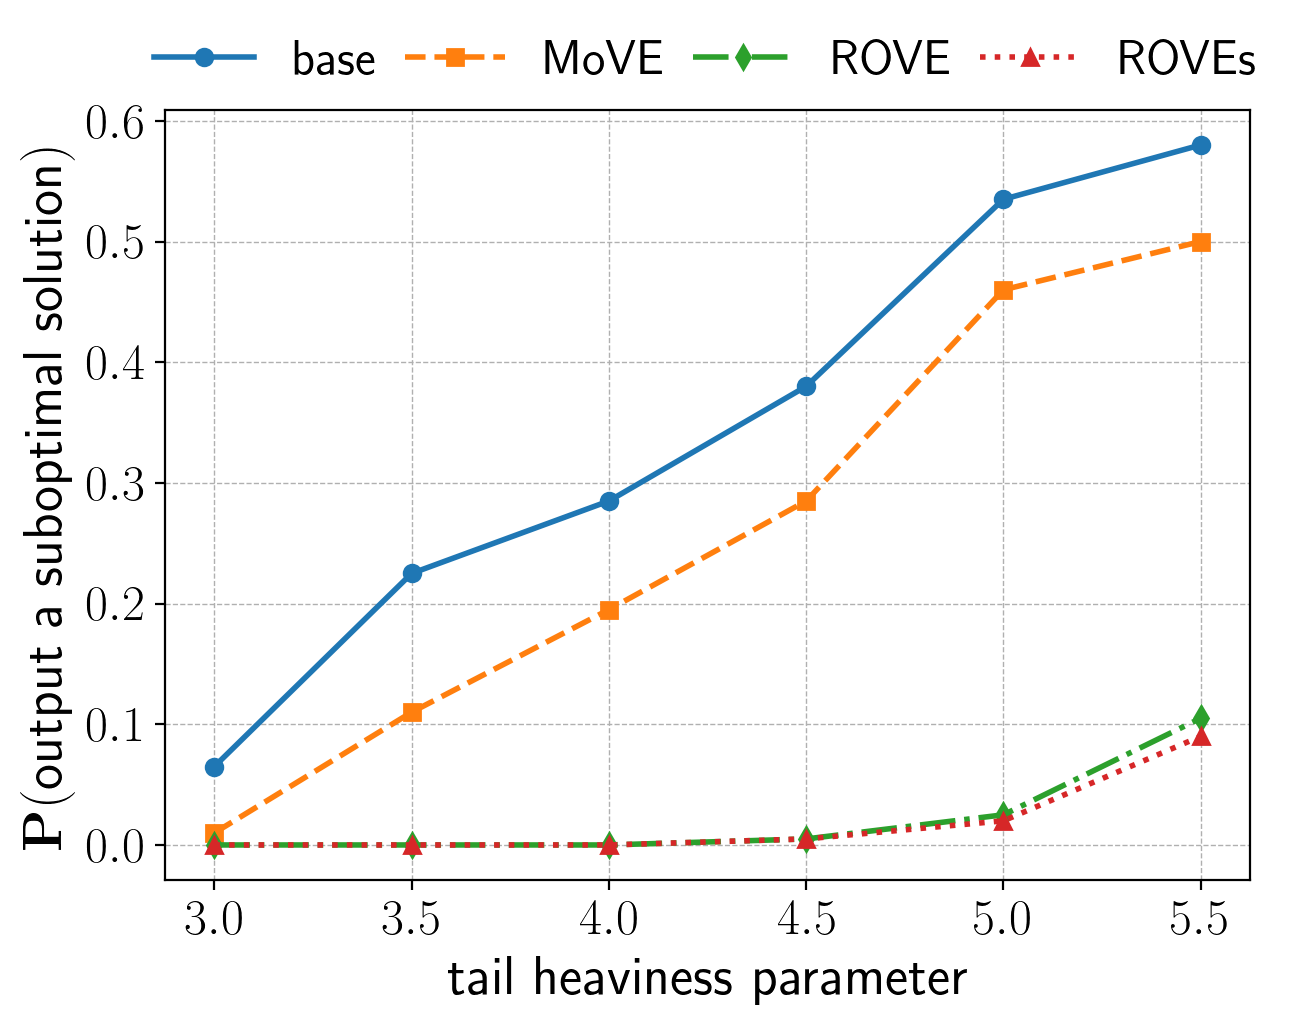

In [330]:
# influence of tail heaviness on the algorithm performance (Figure 5a)
with open("./prob_plots/LP_tail_influence.json", "r") as f:
    prob_lists = json.load(f)
# print(prob_lists.keys())
SAA_prob_list = prob_lists["SAA_prob_list"]
bagging_alg1_prob_list = prob_lists["bagging_alg1_prob_list"][0]
bagging_alg3_prob_list = prob_lists["bagging_alg3_prob_list"][0]
bagging_alg4_prob_list = prob_lists["bagging_alg4_prob_list"][0]

tail_list = [3,3.5,4,4.5,5,5.5]
fig, ax = plt.subplots(figsize = (7, 5), dpi=200)
curve_SAA = [1-item for item in SAA_prob_list]
curve_alg1 = [1-item for item in bagging_alg1_prob_list]
curve_alg3 = [1-item for item in bagging_alg3_prob_list]
curve_alg4 = [1-item for item in bagging_alg4_prob_list]

label_list = ['base', 'MoVE', 'ROVE', 'ROVEs']
curve_list = [curve_SAA, curve_alg1, curve_alg3, curve_alg4]
for ind, curve in enumerate(curve_list):
    ax.plot(tail_list, curve, marker=markers[ind % len(markers)],
            linestyle=lineStyles[ind % len(lineStyles)], linewidth=2,
            color=default_colors[ind % len(default_colors)],
        label=label_list[ind])

ax.set_xlabel('tail heaviness parameter', size=20)
ax.set_ylabel('$\mathbf{P(}$output a suboptimal solution$\mathbf{)}$', size=20)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
# ax.set_xticks(index + 1.5 * bar_width)
# ax.set_xticklabels(tail_list)
ax.legend(fontsize = 18, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, columnspacing=0.5, frameon=False, bbox_transform=ax.transAxes)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig("./prob_plots/LP_tail_influence.png", bbox_inches = "tight", dpi=500)
plt.show()

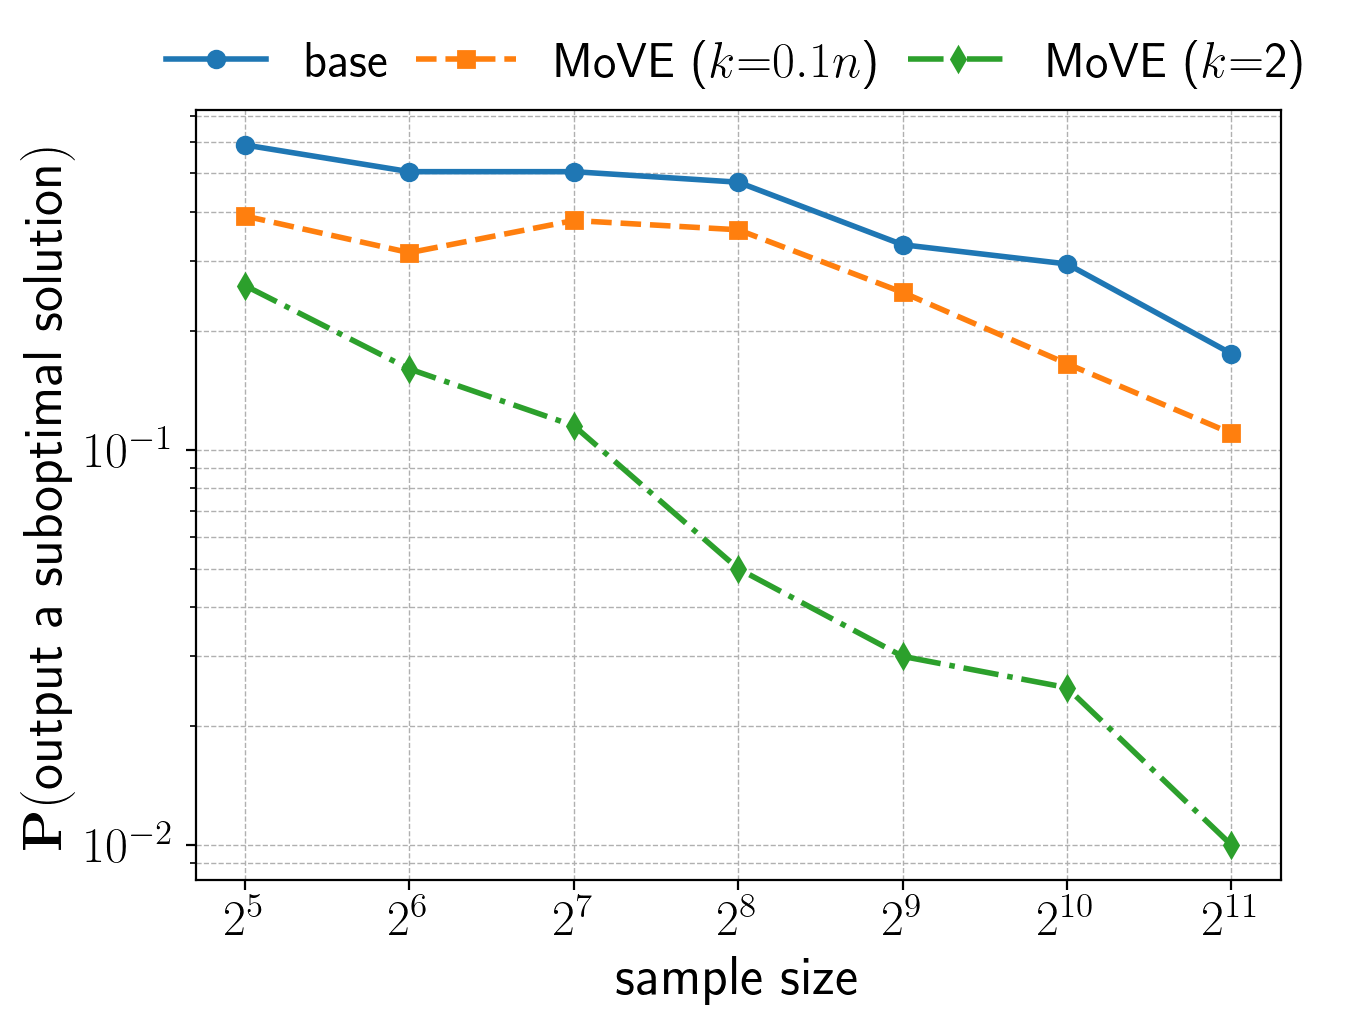

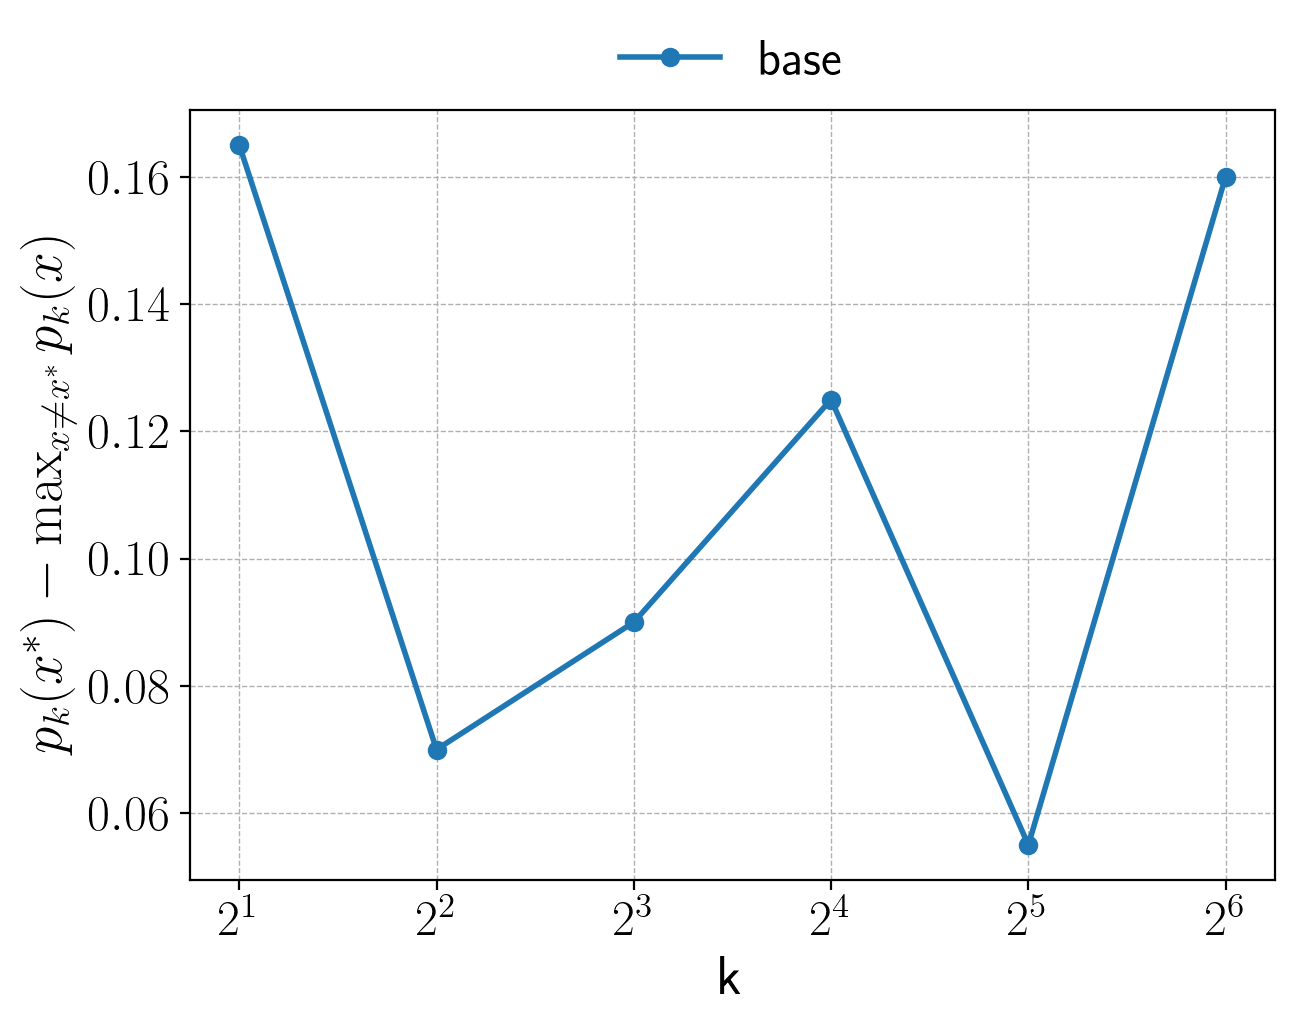

In [331]:
# pk(x) in SSKP instance 1 (Figures 9a and 9b)
with open("./prob_plots/SSKP_prob_comparison1.json", "r") as f:
    prob_lists = json.load(f)
# k = 0.1, 2
# print(prob_lists.keys())
SAA_prob_opt_list = prob_lists["SAA_prob_opt_list"]
bagging_prob_opt_list_1 = prob_lists["bagging_prob_opt_list"][0][0]
bagging_prob_opt_list_2 = prob_lists["bagging_prob_opt_list"][0][1]

sample_number = [2**i for i in range(5, 12)]

fig, ax = plt.subplots(figsize = (7, 5), dpi=200)

curve_SAA = [1-item for item in SAA_prob_opt_list]
curve_alg1_1 = [1-item for item in bagging_prob_opt_list_1]
curve_alg1_2 = [1-item for item in bagging_prob_opt_list_2]

label_list = ['base', 'MoVE ($k$=$0.1n$)', 'MoVE ($k$=2)']
curve_list = [curve_SAA, curve_alg1_1, curve_alg1_2]

for ind, curve in enumerate(curve_list):
    ax.plot(sample_number, curve, marker=markers[ind % len(markers)],
            linestyle=lineStyles[ind % len(lineStyles)], linewidth=2,
            color=default_colors[ind % len(default_colors)], label=label_list[ind])


ax.set_xlabel('sample size', size=20)
ax.set_ylabel('$\mathbf{P(}$output a suboptimal solution$\mathbf{)}$', size=20)
ax.set_xscale('log', base = 2)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.legend(fontsize = 18, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, frameon=False, bbox_transform=ax.transAxes, columnspacing=0.5)
ax.set_yscale('log')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig("./prob_plots/SSKP_prob_suboptimal_1.png", bbox_inches = "tight", dpi=500)
plt.show()


with open("./prob_plots/SSKP_prob_difference1.json", "r") as f:
    prob_lists = json.load(f)

sample_number = [2**i for i in range(1, 7)]
SAA_prob_diff_list = prob_lists["SAA_prob_diff_list"]

fig, ax = plt.subplots(figsize = (7, 5), dpi=200)
curve_SAA = [item for item in SAA_prob_diff_list]
ind = 0
ax.plot(sample_number, curve_SAA, marker = markers[ind % len(markers)],
        linestyle = lineStyles[ind % len(lineStyles)], linewidth = 2,
        color=default_colors[ind % len(default_colors)], label='base')

ax.set_xlabel('k', size=20)
ax.set_ylabel(r'$p_k(x^*) - \max_{x \neq x^*} p_k(x)$', fontsize=20)
ax.set_xscale('log', base = 2)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.legend(fontsize = 18, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, frameon=False, bbox_transform=ax.transAxes, columnspacing=0.5)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig("./prob_plots/SSKP_prob_diff_1.png", bbox_inches = "tight", dpi=500)
plt.show()

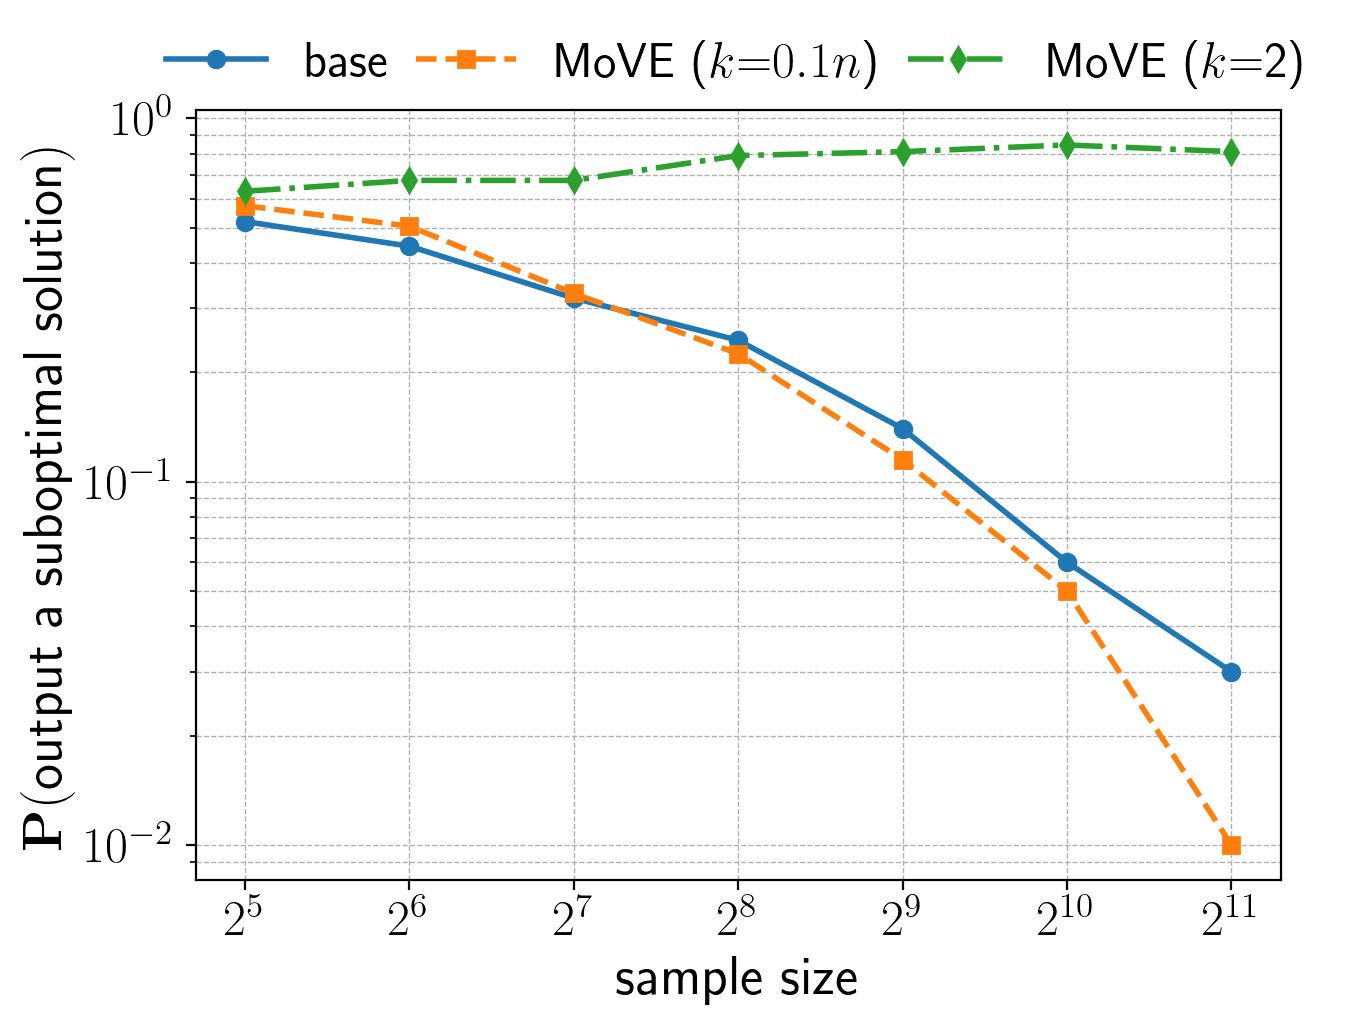

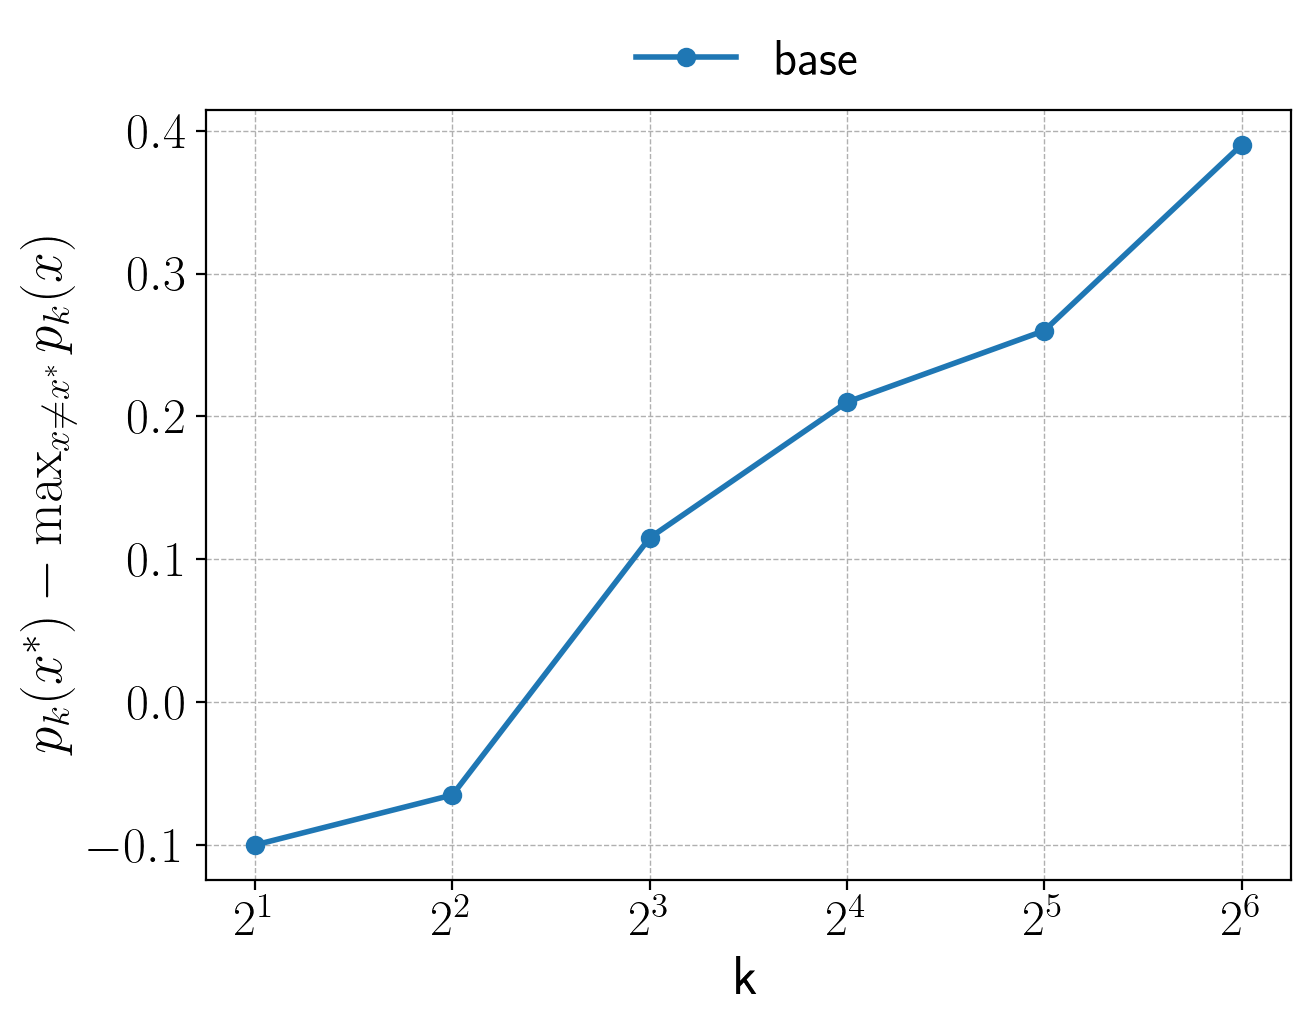

In [332]:
# pk(x) in SSKP instance 2 (Figures 9c and 9d)
with open("./prob_plots/SSKP_prob_comparison2.json", "r") as f:
    prob_lists = json.load(f)
# k = 0.1, 2
# print(prob_lists.keys())
SAA_prob_opt_list = prob_lists["SAA_prob_opt_list"]
bagging_prob_opt_list_1 = prob_lists["bagging_prob_opt_list"][0][0]
bagging_prob_opt_list_2 = prob_lists["bagging_prob_opt_list"][0][1]

sample_number = [2**i for i in range(5, 12)]

fig, ax = plt.subplots(figsize = (7, 5), dpi=200)

curve_SAA = [1-item for item in SAA_prob_opt_list]
curve_alg1_1 = [1-item for item in bagging_prob_opt_list_1]
curve_alg1_2 = [1-item for item in bagging_prob_opt_list_2]

label_list = ['base', 'MoVE ($k$=$0.1n$)', 'MoVE ($k$=2)']
curve_list = [curve_SAA, curve_alg1_1, curve_alg1_2]

for ind, curve in enumerate(curve_list):
    ax.plot(sample_number, curve, marker=markers[ind % len(markers)],
            linestyle=lineStyles[ind % len(lineStyles)], linewidth=2,
            color=default_colors[ind % len(default_colors)], label=label_list[ind])


ax.set_xlabel('sample size', size=20)
ax.set_ylabel('$\mathbf{P(}$output a suboptimal solution$\mathbf{)}$', size=20)
ax.set_xscale('log', base = 2)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.legend(fontsize = 18, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, frameon=False, bbox_transform=ax.transAxes, columnspacing=0.5)
ax.set_yscale('log')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig("./prob_plots/SSKP_prob_suboptimal_2.png", bbox_inches = "tight", dpi=500)
plt.show()


with open("./prob_plots/SSKP_prob_difference2.json", "r") as f:
    prob_lists = json.load(f)

sample_number = [2**i for i in range(1, 7)]
SAA_prob_diff_list = prob_lists["SAA_prob_diff_list"]

fig, ax = plt.subplots(figsize = (7, 5), dpi=200)
curve_SAA = [item for item in SAA_prob_diff_list]
ind = 0
ax.plot(sample_number, curve_SAA, marker = markers[ind % len(markers)],
        linestyle = lineStyles[ind % len(lineStyles)], linewidth = 2,
        color=default_colors[ind % len(default_colors)], label='base')

ax.set_xlabel('k', size=20)
ax.set_ylabel(r'$p_k(x^*) - \max_{x \neq x^*} p_k(x)$', fontsize=20)
ax.set_xscale('log', base = 2)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.legend(fontsize = 18, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, frameon=False, bbox_transform=ax.transAxes, columnspacing=0.5)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig("./prob_plots/SSKP_prob_diff_2.png", bbox_inches = "tight", dpi=500)
plt.show()

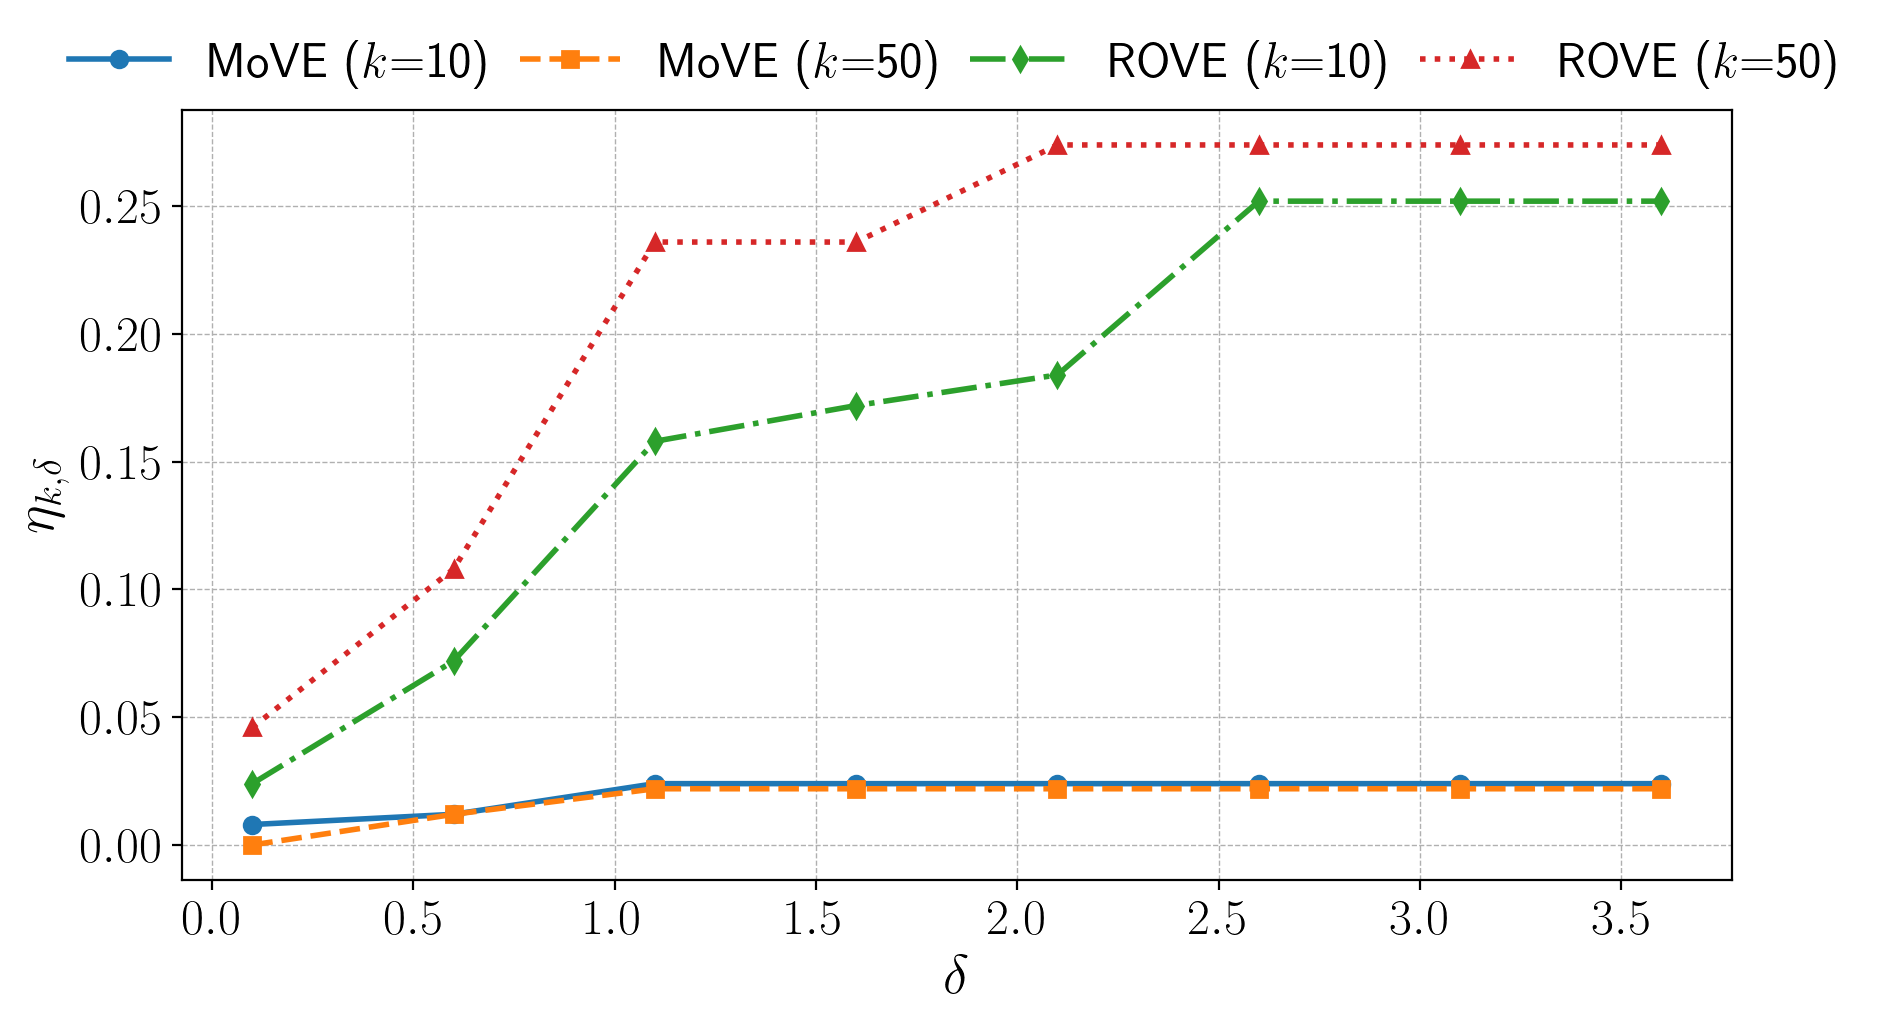

In [333]:
# comparison of eta in LP (Figure 10)
# epsilon = 4 when n = 10, epsilon = 2.5 when n = 50
with open("./prob_plots/eta_10.json", "r") as f:
    prob_lists_10 = json.load(f)
with open("./prob_plots/eta_50.json", "r") as f:
    prob_lists_50 = json.load(f)
delta_list = prob_lists_10["delta_list"]
# print(prob_lists_10.keys())
# print(data_lists_10.keys())

SAA_eta_10 = prob_lists_10["SAA_eta"]
Alg34_eta_10 = prob_lists_10["Alg34_eta"]
SAA_eta_50 = prob_lists_50["SAA_eta"]
Alg34_eta_50 = prob_lists_50["Alg34_eta"]

label_list = ['MoVE ($k$=10)', 'MoVE ($k$=50)', 'ROVE ($k$=10)', 'ROVE ($k$=50)']
curve_list = [SAA_eta_10, SAA_eta_50, Alg34_eta_10, Alg34_eta_50]

fig, ax = plt.subplots(figsize = (10, 5), dpi=200)
for ind, curve in enumerate(curve_list):
    ax.plot(delta_list, curve, marker=markers[ind % len(markers)],
            linestyle=lineStyles[ind % len(lineStyles)], linewidth=2,
            color=default_colors[ind % len(default_colors)], label=label_list[ind])

ax.set_xlabel('$\delta$', fontsize = 20)
ax.set_ylabel('$\eta_{k,\delta}$', fontsize = 20)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.legend(fontsize = 18, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, frameon=False, bbox_transform=ax.transAxes, columnspacing=0.5)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig("./prob_plots/eta_comparison_LP.png", bbox_inches = "tight", dpi=500)
plt.show()

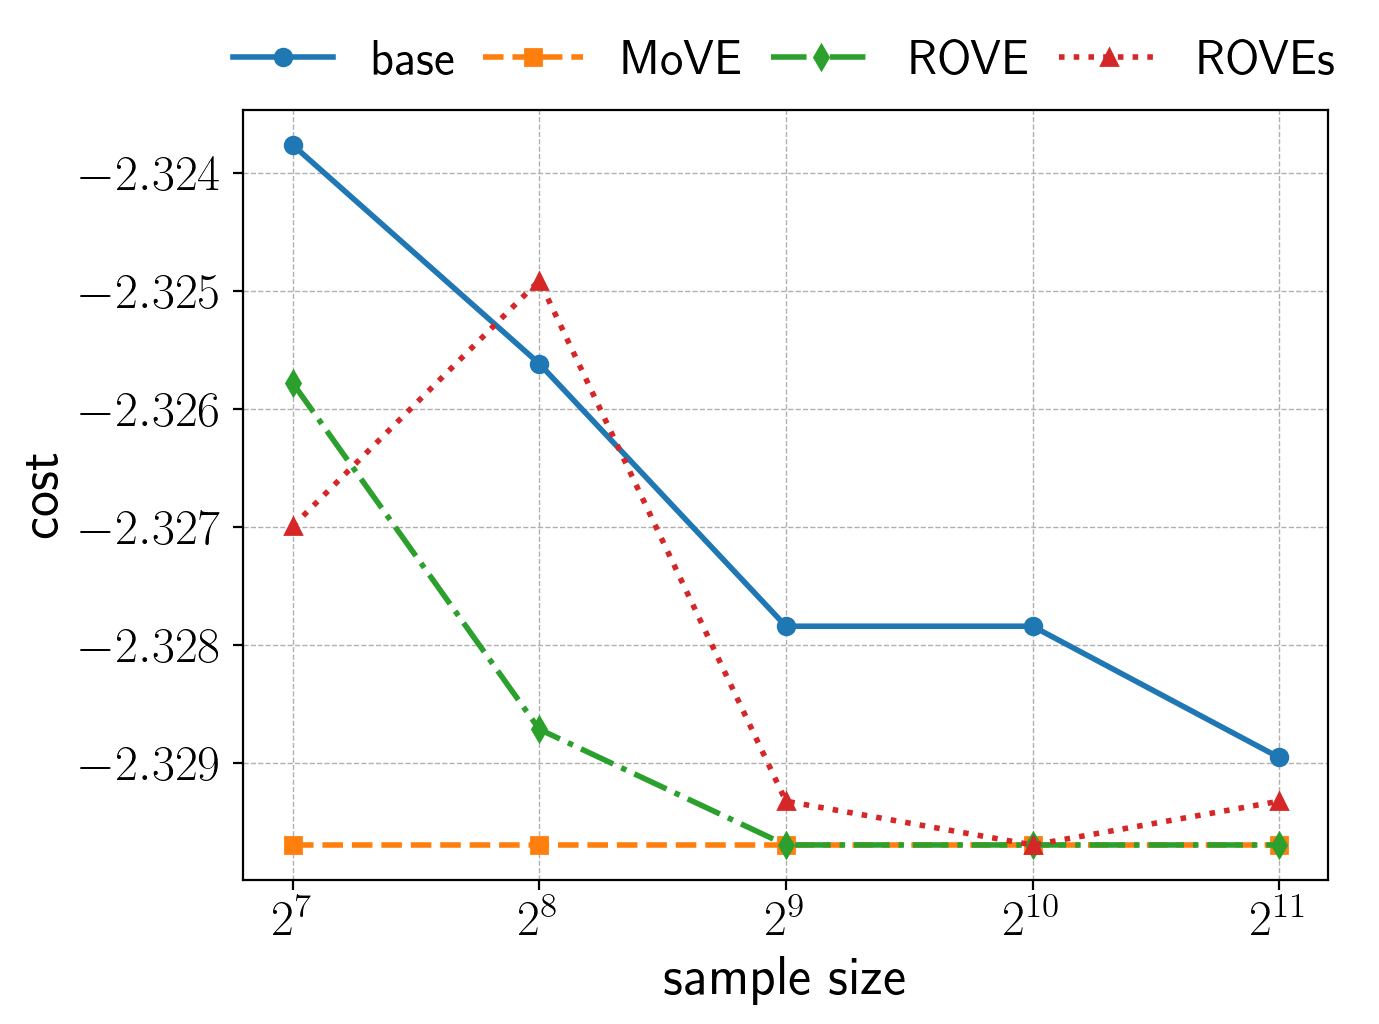

In [334]:
# LP (Figure 4a)
# k_list = [0.1, 10]
with open("./SAA_comparison/obj_lists_LP_light_1.json", "r") as f:
    obj_lists = json.load(f)
SAA_obj_list = obj_lists["SAA_obj_list"]
SAA_obj_avg = obj_lists["SAA_obj_avg"]
bagging_alg1_obj_list = obj_lists["bagging_alg1_obj_list"]
bagging_alg1_obj_avg = obj_lists["bagging_alg1_obj_avg"]
bagging_alg3_obj_list = obj_lists["bagging_alg3_obj_list"]
bagging_alg3_obj_avg = obj_lists["bagging_alg3_obj_avg"]
bagging_alg4_obj_list = obj_lists["bagging_alg4_obj_list"]
bagging_alg4_obj_avg = obj_lists["bagging_alg4_obj_avg"]

sample_number = [2**i for i in range(7, 12)]

curve_SAA = [-item for item in SAA_obj_avg]
curve_alg1 = [-item for item in bagging_alg1_obj_avg[0][1]]
curve_alg3 = [-item for item in bagging_alg3_obj_avg[0][1]]
curve_alg4 = [-item for item in bagging_alg4_obj_avg[0][1]]

label_list = ['base', 'MoVE', 'ROVE', 'ROVEs']
curve_list = [curve_SAA, curve_alg1, curve_alg3, curve_alg4]

fig, ax = plt.subplots(figsize = (7, 5), dpi=200)
for ind, curve in enumerate(curve_list):
    ax.plot(sample_number, curve, marker=markers[ind % len(markers)],
            linestyle=lineStyles[ind % len(lineStyles)], linewidth=2,
            color=default_colors[ind % len(default_colors)], label=label_list[ind])

ax.set_xlabel('sample size', size=20)
ax.set_ylabel('cost', size=20) 
ax.set_xscale('log', base = 2)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.legend(fontsize = 18, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, frameon=False, bbox_transform=ax.transAxes, columnspacing=0.5)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig("./SAA_comparison/SAA_comparison_LP_light_1.png", bbox_inches = "tight", dpi=500)
plt.show()

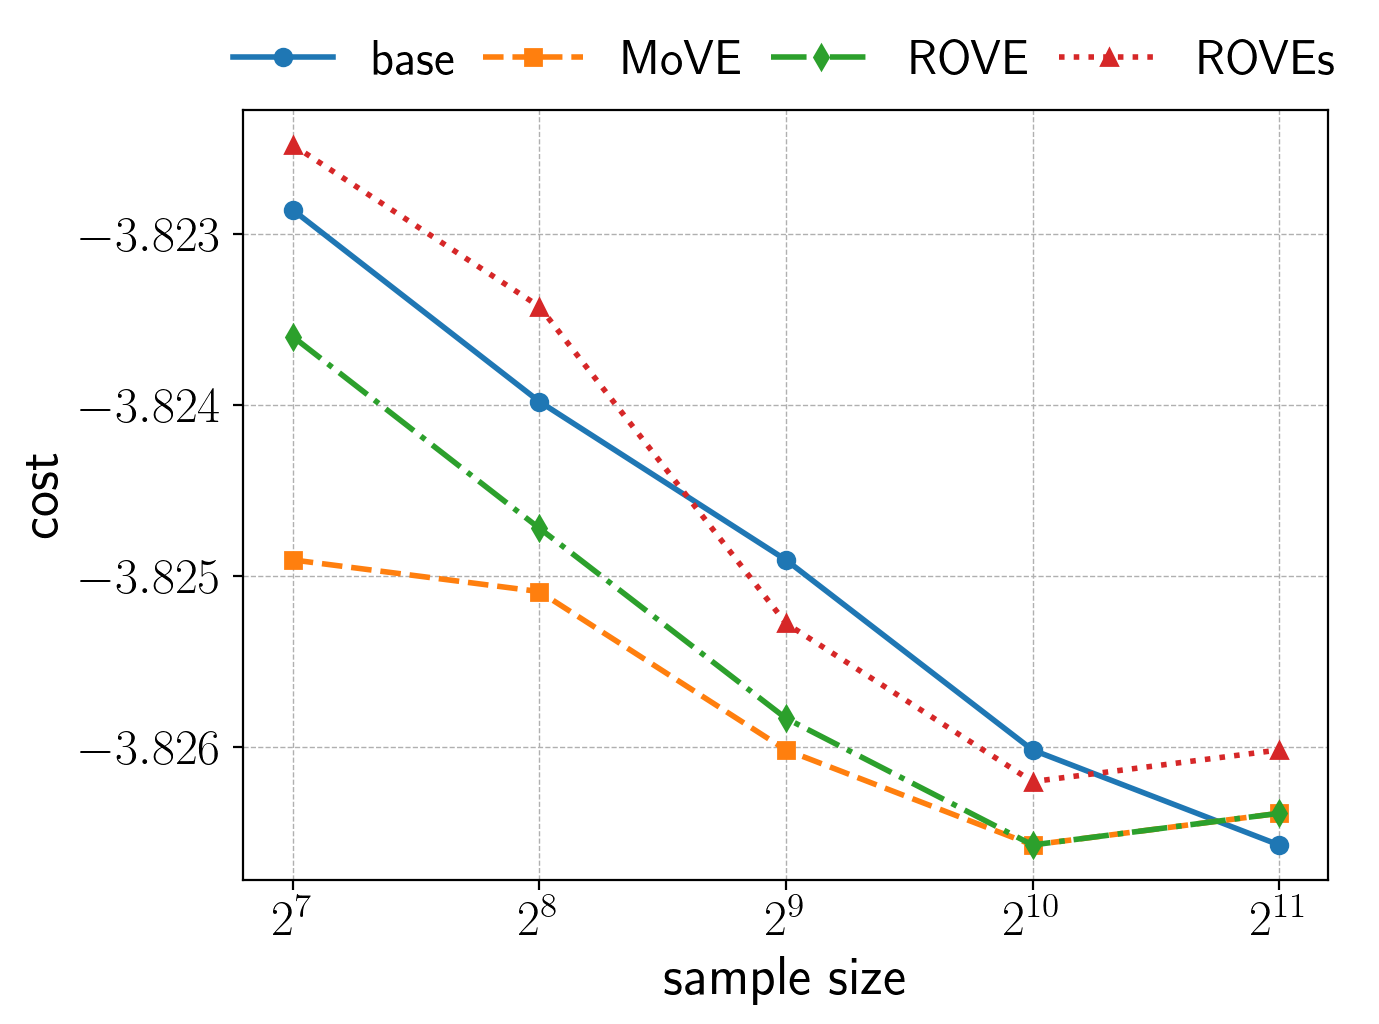

In [335]:
# LP (Figure 4b)
# k_list = [0.1, 10]
with open("./SAA_comparison/obj_lists_LP_light_2.json", "r") as f:
    obj_lists = json.load(f)
SAA_obj_list = obj_lists["SAA_obj_list"]
SAA_obj_avg = obj_lists["SAA_obj_avg"]
bagging_alg1_obj_list = obj_lists["bagging_alg1_obj_list"]
bagging_alg1_obj_avg = obj_lists["bagging_alg1_obj_avg"]
bagging_alg3_obj_list = obj_lists["bagging_alg3_obj_list"]
bagging_alg3_obj_avg = obj_lists["bagging_alg3_obj_avg"]
bagging_alg4_obj_list = obj_lists["bagging_alg4_obj_list"]
bagging_alg4_obj_avg = obj_lists["bagging_alg4_obj_avg"]

sample_number = [2**i for i in range(7, 12)]

curve_SAA = [-item for item in SAA_obj_avg]
curve_alg1 = [-item for item in bagging_alg1_obj_avg[0][1]]
curve_alg3 = [-item for item in bagging_alg3_obj_avg[0][1]]
curve_alg4 = [-item for item in bagging_alg4_obj_avg[0][1]]

label_list = ['base', 'MoVE', 'ROVE', 'ROVEs']
curve_list = [curve_SAA, curve_alg1, curve_alg3, curve_alg4]

fig, ax = plt.subplots(figsize = (7, 5), dpi=200)
for ind, curve in enumerate(curve_list):
    ax.plot(sample_number, curve, marker=markers[ind % len(markers)],
            linestyle=lineStyles[ind % len(lineStyles)], linewidth=2,
            color=default_colors[ind % len(default_colors)], label=label_list[ind])

ax.set_xlabel('sample size', size=20)
ax.set_ylabel('cost', size=20) 
ax.set_xscale('log', base = 2)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.legend(fontsize = 18, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, frameon=False, bbox_transform=ax.transAxes, columnspacing=0.5)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig("./SAA_comparison/SAA_comparison_LP_light_2.png", bbox_inches = "tight", dpi=500)
plt.show()

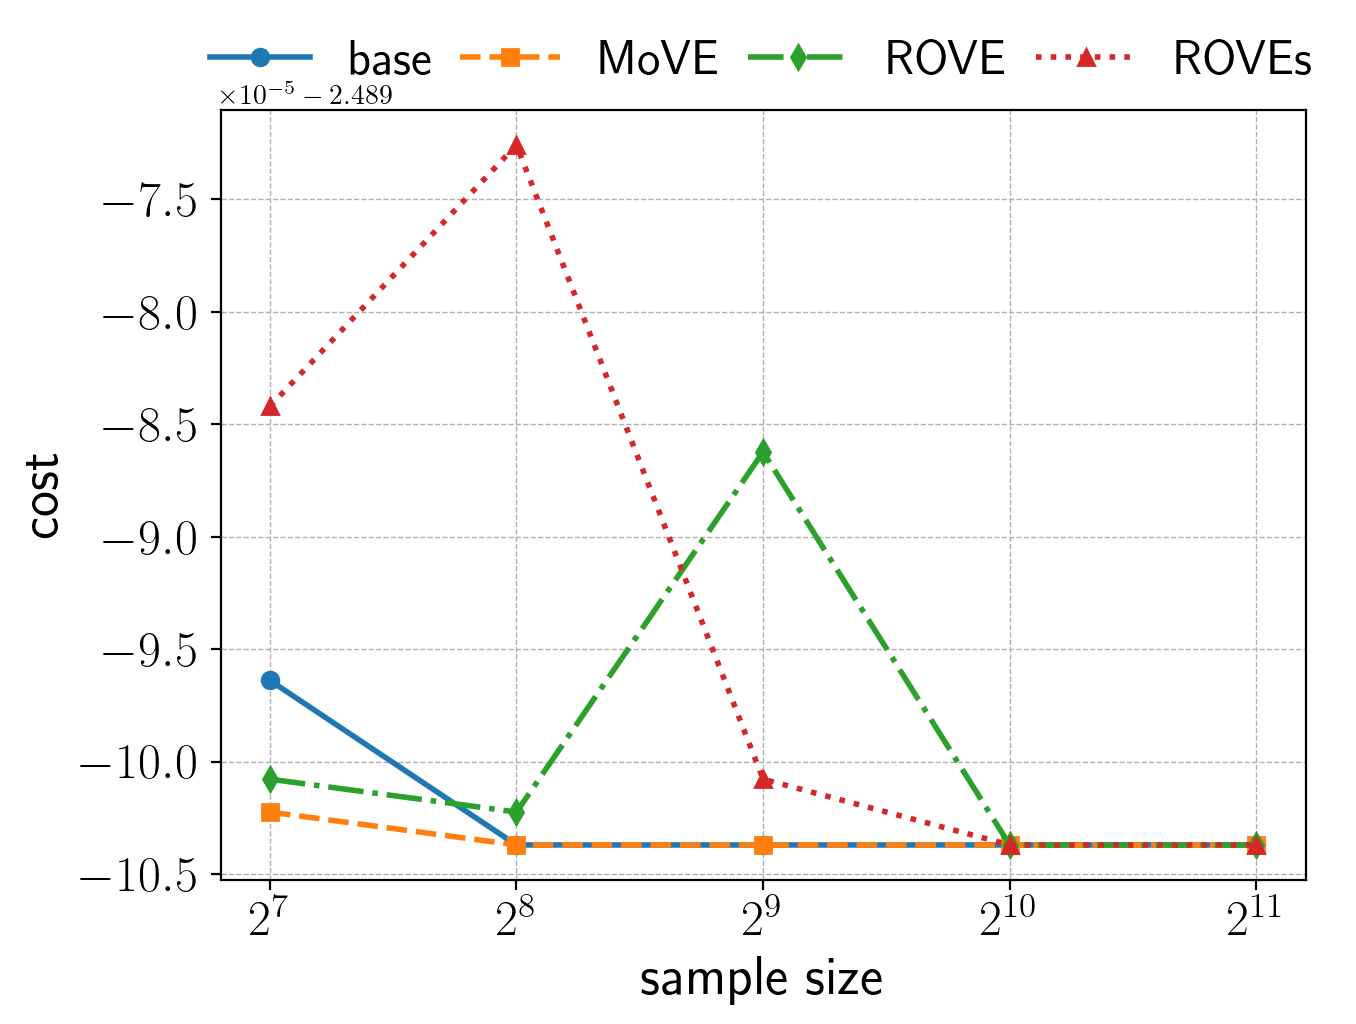

In [336]:
# LP (Figure 4c)
# k_list = [0.1, 10]
with open("./SAA_comparison/obj_lists_LP_light_3.json", "r") as f:
    obj_lists = json.load(f)
SAA_obj_list = obj_lists["SAA_obj_list"]
SAA_obj_avg = obj_lists["SAA_obj_avg"]
bagging_alg1_obj_list = obj_lists["bagging_alg1_obj_list"]
bagging_alg1_obj_avg = obj_lists["bagging_alg1_obj_avg"]
bagging_alg3_obj_list = obj_lists["bagging_alg3_obj_list"]
bagging_alg3_obj_avg = obj_lists["bagging_alg3_obj_avg"]
bagging_alg4_obj_list = obj_lists["bagging_alg4_obj_list"]
bagging_alg4_obj_avg = obj_lists["bagging_alg4_obj_avg"]

sample_number = [2**i for i in range(7, 12)]

curve_SAA = [-item for item in SAA_obj_avg]
curve_alg1 = [-item for item in bagging_alg1_obj_avg[0][1]]
curve_alg3 = [-item for item in bagging_alg3_obj_avg[0][1]]
curve_alg4 = [-item for item in bagging_alg4_obj_avg[0][1]]

label_list = ['base', 'MoVE', 'ROVE', 'ROVEs']
curve_list = [curve_SAA, curve_alg1, curve_alg3, curve_alg4]

fig, ax = plt.subplots(figsize = (7, 5), dpi=200)
for ind, curve in enumerate(curve_list):
    ax.plot(sample_number, curve, marker=markers[ind % len(markers)],
            linestyle=lineStyles[ind % len(lineStyles)], linewidth=2,
            color=default_colors[ind % len(default_colors)], label=label_list[ind])

ax.set_xlabel('sample size', size=20)
ax.set_ylabel('cost', size=20)
ax.set_xscale('log', base = 2)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.legend(fontsize = 18, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, frameon=False, bbox_transform=ax.transAxes, columnspacing=0.5)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig("./SAA_comparison/SAA_comparison_LP_light_3.png", bbox_inches = "tight", dpi=500)
plt.show()

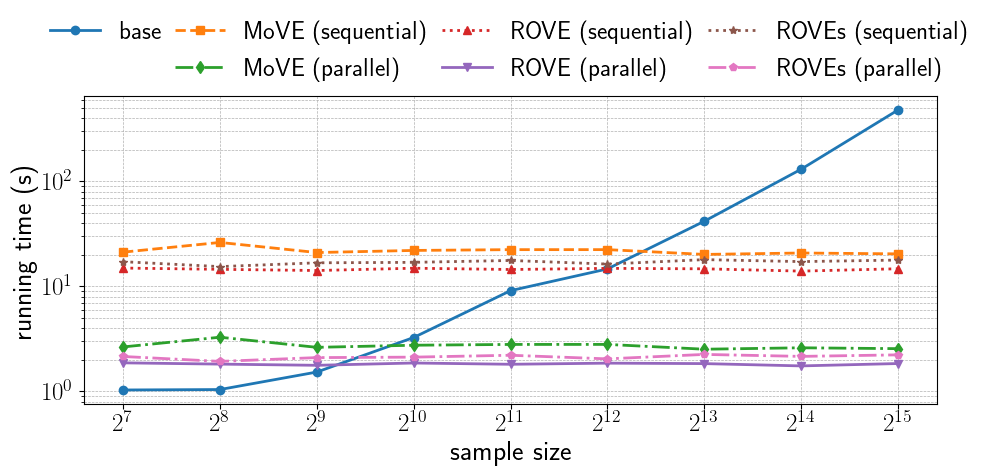

In [337]:
import matplotlib.patches as mpatches
sample_number = [2**i for i in range(7,16)]

SAA_time = [1.0318, 1.0417, 1.5291, 3.2617, 9.1172, 14.6818, 41.8052, 130.8701, 480.0050]
bagging_alg1_time_parallel = [2.6520, 3.2827, 2.6298, 2.7542, 2.8024, 2.8036, 2.5237, 2.6034, 2.5547]
bagging_alg34_time_parallel = [10.1923, 9.6996, 13.7856, 10.3796, 9.5464, 9.7674, 9.7105, 9.5395, 9.8959]
suboptimality_matrix_time = [3.2+3.25,3.03*2, 2.94+3.71+3.59, 3.36+3.29,2.99+2.93, 3.02+3.03, 2.96+3.07,3.13+2.91, 3.12+3.09]
bagging_alg3_time_parallel = []
for i in range(len(sample_number)):
    bagging_alg3_time_parallel.append((bagging_alg34_time_parallel[i] - suboptimality_matrix_time[i])/2)

bagging_alg4_time_parallel = [item+np.random.uniform(0.1,0.5) for item in bagging_alg3_time_parallel]

bagging_alg1_time = [item * 8 for item in bagging_alg1_time_parallel]
bagging_alg3_time = [item * 8 for item in bagging_alg3_time_parallel]
bagging_alg4_time = [item * 8 for item in bagging_alg4_time_parallel]

label_list = ['base', 'MoVE (sequential)', 'MoVE (parallel)', 'ROVE (sequential)', 'ROVE (parallel)', 'ROVEs (sequential)', 'ROVEs (parallel)']
curve_list = [SAA_time, bagging_alg1_time, bagging_alg1_time_parallel, bagging_alg3_time, bagging_alg3_time_parallel, bagging_alg4_time, bagging_alg4_time_parallel]

fig, ax = plt.subplots(figsize = (11, 4))
for ind, curve in enumerate(curve_list):
    ax.plot(sample_number, curve, marker=markers[ind % len(markers)],
            linestyle=lineStyles[ind % len(lineStyles)], linewidth=2,
            color=default_colors[ind % len(default_colors)], label=label_list[ind])

ax.set_xlabel('sample size', fontsize = 20)
ax.set_ylabel('running time (s)', fontsize = 20)
ax.set_xscale('log', base = 2)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)


# Create the legend with a blank entry
handles, labels = ax.get_legend_handles_labels()
# Insert a "dummy" rectangle as the placeholder
empty_handle = mpatches.Rectangle((0,0), 1, 1, fill=False, edgecolor='none', visible=False)
handles.insert(1, empty_handle)
labels.insert(1, "")
ax.legend(handles, labels, fontsize=18, loc='upper center', bbox_to_anchor=(0.5, 1.32), ncol=4, frameon=False, bbox_transform=ax.transAxes, columnspacing=0.5)

# ax.legend(fontsize = 18, loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=4, frameon=False, bbox_transform=ax.transAxes, columnspacing=0.5)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_yscale('log')
plt.savefig("./running_time_network.png", bbox_inches = "tight")
plt.show()